<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Wind-Turbines-Analysis-and-Analytics-of-Power-Generation-by-using-Long-Short-Term-Memory/blob/main/Date_Time_analysis_of_Wind_Turbine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle_MyAPI"

In [ ]:
! kaggle datasets download psycon/wind-turbine-energy-kw-generation-data
! unzip wind-turbine-energy-kw-generation-data.zip

 97% 49.0M/50.5M [00:03<00:00, 18.5MB/s]
100% 50.5M/50.5M [00:03<00:00, 14.5MB/s]
Archive:  wind-turbine-energy-kw-generation-data.zip
  inflating: feature_units.csv       
  inflating: features.csv            
  inflating: power.csv               
  inflating: sample_submission.csv   


 We have 3 dataset files about this data 


1.   Power dataset [ power output quantity ]
2.   Units of thw features
3.   features



In [ ]:
df=pd.read_csv('power.csv')
df.head()

Timestamp    Power(kW)
0  2019-01-01 00:00:00   705.876648
1  2019-01-01 00:10:00   884.711670
2  2019-01-01 00:20:00   982.875000
3  2019-01-01 00:30:00  1115.943359
4  2019-01-01 00:40:00  1263.841675

In [ ]:
df.tail()

Timestamp    Power(kW)
136725  2021-08-14 23:10:00  2757.728271
136726  2021-08-14 23:20:00  2758.323242
136727  2021-08-14 23:30:00  2759.243408
136728  2021-08-14 23:40:00  2761.261719
136729  2021-08-14 23:50:00  2758.593262

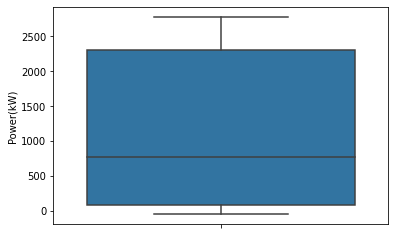

In [ ]:
sns.boxplot(y='Power(kW)',data=df);

In the general form, the numbers appear in a moderate state in relation to the goal, and it does not require us to work on the goal to improve it in one way or another.

In [ ]:
df['Timestamp'][0], df['Timestamp'][136729]

('2019-01-01 00:00:00', '2021-08-14 23:50:00')

In [ ]:
df['Timestamp'][0], df['Timestamp'][1], df['Timestamp'][2]

('2019-01-01 00:00:00', '2019-01-01 00:10:00', '2019-01-01 00:20:00')

Samples were taken on a daily basis every 10 minutes for a period from the beginning of 2019 to the month of 8 of 2021, so our database is strong and large and dealing with it is a bit difficult

In [ ]:
features_df = pd.read_csv('features.csv')
features_df.head()

Timestamp  Gearbox_T1_High_Speed_Shaft_Temperature  \
0  2019-01-01 00:00:00                                57.000000   
1  2019-01-01 00:10:00                                57.693333   
2  2019-01-01 00:20:00                                59.000000   
3  2019-01-01 00:30:00                                59.881668   
4  2019-01-01 00:40:00                                61.290001   

   Gearbox_T3_High_Speed_Shaft_Temperature  \
0                                59.000000   
1                                59.485001   
2                                60.756668   
3                                61.563332   
4                                62.586666   

   Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
0                                        52.000000   
1                                        52.450001   
2                                        53.536667   
3                                        54.413334   
4                                        55.485001   

   Temperature Gearbox Bearing Hollow Shaft  Tower Acceleration Normal  \
0                                 56.158333                  47.053776   
1                                 57.000000                  64.969742   
2                                 57.775002                  51.149670   
3                                 58.683334                  58.740929   
4                                 59.623333                  53.264774   

   Gearbox_Oil-2_Temperature  Tower Acceleration Lateral  \
0                  57.000000                   18.890772   
1                  57.413334                   28.560265   
2                  58.728333                   34.228813   
3                  59.518333                   35.593220   
4                  60.665001                   38.552731   

   Temperature Bearing_A  Temperature Trafo-3  ...  \
0              35.000000            48.576668  ...   
1              35.233334            48.000000  ...   
2              36.000000            48.053333  ...   
3              36.000000            48.788334  ...   
4              36.000000            49.000000  ...   

   Blade-1 Actual Value_Angle-A  Blade-2 Set Value_Degree  \
0                      0.055473                  0.267122   
1                      0.055473                  0.267122   
2                      0.055473                  0.267122   
3                      0.055473                  0.267122   
4                      0.053982                  0.267612   

   Pitch Demand Baseline_Degree  Blade-1 Set Value_Degree  \
0                           0.0                  0.058617   
1                           0.0                  0.058617   
2                           0.0                  0.058617   
3                           0.0                  0.058617   
4                           0.0                  0.058703   

   Blade-3 Set Value_Degree  Moment Q Direction  Moment Q Filltered  \
0                 -0.325738           37.867054           39.281124   
1                 -0.325738          -90.169106          -89.018669   
2                 -0.325738          -88.556343          -88.422020   
3                 -0.325738         -123.755341         -124.858444   
4                 -0.325443         -142.533325         -142.053543   

   Proxy Sensor_Degree-45  Turbine State  Proxy Sensor_Degree-315  
0                5.732657            1.0                 5.779913  
1                5.813177            1.0                 5.796757  
2                5.786413            1.0                 5.772958  
3                5.758913            1.0                 5.728393  
4                5.724591            1.0                 5.687730  

[5 rows x 77 columns]

In [ ]:
features_df['Timestamp'] =  pd.to_datetime(features_df['Timestamp'])

In [ ]:
features_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154262 entries, 0 to 154261
Data columns (total 77 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   Timestamp                                          154262 non-null  datetime64[ns]
 1   Gearbox_T1_High_Speed_Shaft_Temperature            149913 non-null  float64       
 2   Gearbox_T3_High_Speed_Shaft_Temperature            149744 non-null  float64       
 3   Gearbox_T1_Intermediate_Speed_Shaft_Temperature    150253 non-null  float64       
 4   Temperature Gearbox Bearing Hollow Shaft           150530 non-null  float64       
 5   Tower Acceleration Normal                          149904 non-null  float64       
 6   Gearbox_Oil-2_Temperature                          149326 non-null  float64       
 7   Tower Acceleration Lateral                         150070 non-null  float64       
 8   Temp

Many of the existing features are inherently related to the output of electrical generation, so they do not affect the work of the turbine in some way or do not enter into the state of production based on the turbine.
like : Moment Q Direction ,Line Frequency, Reactive Power ,Voltage B-N

There are also some missing values, not many, but we can deal with them through the mean

In [ ]:
# NULLS 
for i in range(1,len(features_df.columns)) : 
      features_df[features_df.columns[i]].fillna(features_df[features_df.columns[i]].mean(),inplace = True )
features_df.isna().sum()  

Timestamp                                          0
Gearbox_T1_High_Speed_Shaft_Temperature            0
Gearbox_T3_High_Speed_Shaft_Temperature            0
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0
Temperature Gearbox Bearing Hollow Shaft           0
                                                  ..
Moment Q Direction                                 0
Moment Q Filltered                                 0
Proxy Sensor_Degree-45                             0
Turbine State                                      0
Proxy Sensor_Degree-315                            0
Length: 77, dtype: int64

In [ ]:
features_df['Power(kW)'] = df['Power(kW)'] # ADD POWER 

In [ ]:
features_df.columns

Index(['Timestamp', 'Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature', 'Torque',
       'Converter Control Unit Reactive Power', 'Temperature Trafo-2',
       'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'Voltage C-N', 'Temperature Axis Box-2',
       'Temperature Axis Box-1', 'Voltage B-N', 'Nacelle Position_Degree',
       

In [ ]:
col = [ 'Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature', 'Torque',
       'Converter Control Unit Reactive Power', 'Temperature Trafo-2',
       'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'Voltage C-N', 'Temperature Axis Box-2',
       'Temperature Axis Box-1', 'Voltage B-N', 'Nacelle Position_Degree',
       'Converter Control Unit Voltage', 'Temperature Battery Box-3',
       'Temperature Battery Box-2', 'Temperature Battery Box-1',
       'Hydraulic Prepressure', 'Angle Rotor Position',
       'Temperature Tower Base', 'Pitch Offset-2 Asymmetric Load Controller',
       'Pitch Offset Tower Feedback', 'Line Frequency', 'Internal Power Limit',
       'Circuit Breaker cut-ins', 'Particle Counter',
       'Tower Accelaration Normal Raw', 'Torque Offset Tower Feedback',
       'External Power Limit', 'Blade-2 Actual Value_Angle-B',
       'Blade-1 Actual Value_Angle-B', 'Blade-3 Actual Value_Angle-B',
       'Temperature Heat Exchanger Converter Control Unit',
       'Tower Accelaration Lateral Raw', 'Temperature Ambient',
       'Nacelle Revolution', 'Pitch Offset-1 Asymmetric Load Controller',
       'Tower Deflection', 'Pitch Offset-3 Asymmetric Load Controller',
       'Wind Deviation 1 seconds', 'Wind Deviation 10 seconds',
       'Proxy Sensor_Degree-135', 'State and Fault', 'Proxy Sensor_Degree-225',
       'Blade-3 Actual Value_Angle-A', 'Scope CH 4',
       'Blade-2 Actual Value_Angle-A', 'Blade-1 Actual Value_Angle-A',
       'Blade-2 Set Value_Degree', 'Pitch Demand Baseline_Degree',
       'Blade-1 Set Value_Degree', 'Blade-3 Set Value_Degree',
       'Moment Q Direction', 'Moment Q Filltered', 'Proxy Sensor_Degree-45',
       'Turbine State', 'Proxy Sensor_Degree-315']

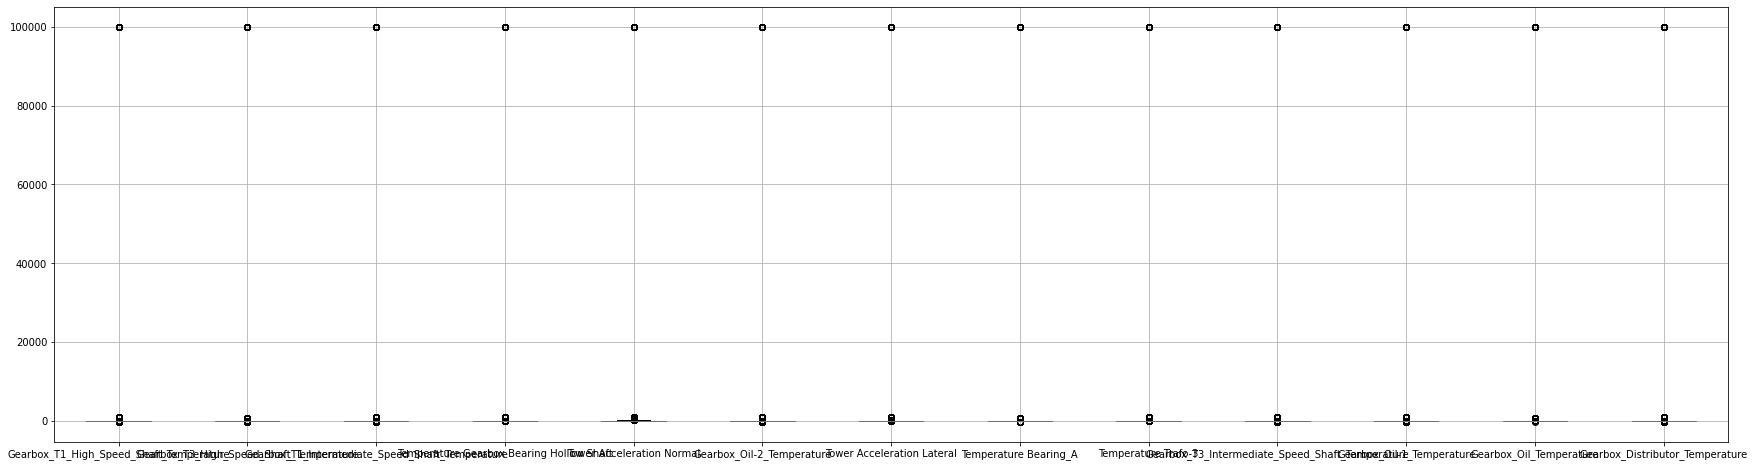

In [ ]:
plt.figure(figsize=(30,8))

Gearbox_2019=features_df[[ 'Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature','Gearbox_Distributor_Temperature']]
Gearbox_2019.boxplot() 

Here we dealt with some outliers in the important characteristics affecting the turbine working cycle through the mean compensation

In [ ]:
def handling_outliers(orignal_df,lst_of_columns) :
    for i in lst_of_columns:
        q1 = orignal_df[i].quantile(0.25)
        q3 = orignal_df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        for col in range(0,orignal_df.shape[0]):
            if orignal_df[i][col] < lower_bound :
                orignal_df[i][col]  = orignal_df[i].mean()
            elif orignal_df[i][col] > upper_bound :
                orignal_df[i][col]  = orignal_df[i].mean()
            else:
                continue 
    print("handling is done")

In [ ]:
handling_outliers(features_df,col)

<ipython-input-17-43037647f270>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orignal_df[i][col]  = orignal_df[i].mean()
<ipython-input-17-43037647f270>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orignal_df[i][col]  = orignal_df[i].mean()


handling is done


# 2019 Analysis :

In 2019 there are 6 * 24 * 365 which is 52123 reading points

It requires us to expect the rest of 2021, which means four months, within 17532 points 

In [ ]:
round = 17532
year = 52123

In [ ]:
# 2019
df_Power_2019=features_df.iloc[0:52123,:]
df_Power_2019['Timestamp'].tail()

52118   2019-12-31 23:10:00
52119   2019-12-31 23:20:00
52120   2019-12-31 23:30:00
52121   2019-12-31 23:40:00
52122   2019-12-31 23:50:00
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
df_Power_2019.reset_index(drop = True,inplace = True)
df_Power_2019.set_index('Timestamp',inplace = True)

In [ ]:
Gearbox_2019.corr()     

Gearbox_T1_High_Speed_Shaft_Temperature  \
Gearbox_T1_High_Speed_Shaft_Temperature                                         1.000000   
Gearbox_T3_High_Speed_Shaft_Temperature                                         0.005937   
Gearbox_T1_Intermediate_Speed_Shaft_Temperature                                 0.003332   
Temperature Gearbox Bearing Hollow Shaft                                       -0.001089   
Tower Acceleration Normal                                                       0.003901   
Gearbox_Oil-2_Temperature                                                      -0.001483   
Tower Acceleration Lateral                                                      0.001621   
Temperature Bearing_A                                                          -0.000332   
Temperature Trafo-3                                                            -0.001949   
Gearbox_T3_Intermediate_Speed_Shaft_Temperature                                -0.006248   
Gearbox_Oil-1_Temperature                                                      -0.004694   
Gearbox_Oil_Temperature                                                         0.001701   
Gearbox_Distributor_Temperature                                                -0.004504   

                                                 Gearbox_T3_High_Speed_Shaft_Temperature  \
Gearbox_T1_High_Speed_Shaft_Temperature                                         0.005937   
Gearbox_T3_High_Speed_Shaft_Temperature                                         1.000000   
Gearbox_T1_Intermediate_Speed_Shaft_Temperature                                -0.005394   
Temperature Gearbox Bearing Hollow Shaft                                       -0.003956   
Tower Acceleration Normal                                                       0.005361   
Gearbox_Oil-2_Temperature                                                       0.000496   
Tower Acceleration Lateral                                                      0.002334   
Temperature Bearing_A                                                          -0.003320   
Temperature Trafo-3                                                             0.004623   
Gearbox_T3_Intermediate_Speed_Shaft_Temperature                                 0.002215   
Gearbox_Oil-1_Temperature                                                       0.003187   
Gearbox_Oil_Temperature                                                        -0.000226   
Gearbox_Distributor_Temperature                                                -0.003738   

                                                 Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
Gearbox_T1_High_Speed_Shaft_Temperature                                                 0.003332   
Gearbox_T3_High_Speed_Shaft_Temperature                                                -0.005394   
Gearbox_T1_Intermediate_Speed_Shaft_Temperature                                         1.000000   
Temperature Gearbox Bearing Hollow Shaft                                               -0.000902   
Tower Acceleration Normal                                                              -0.005195   
Gearbox_Oil-2_Temperature                                                              -0.002817   
Tower Acceleration Lateral                                                             -0.000131   
Temperature Bearing_A                                                                   0.008985   
Temperature Trafo-3                                                                     0.000388   
Gearbox_T3_Intermediate_Speed_Shaft_Temperature                                        -0.003999   
Gearbox_Oil-1_Temperature                                                               0.005207   
Gearbox_Oil_Temperature                                                                -0.007478   
Gearbox_Distributor_Temperature                                                         0.004011   

                                                 Temperature Gearbox B

All the features related to the Jarbox are very affected by each other and related to each other through what appears to us, so we can deal with the most feature affecting them in the analysis

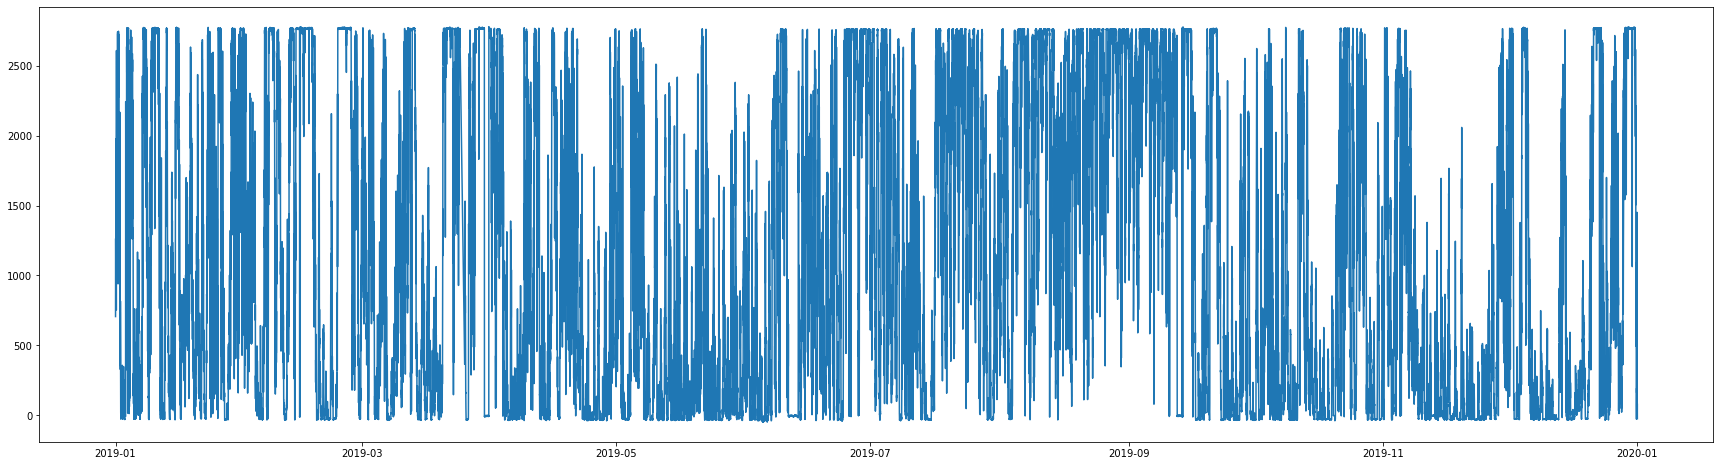

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019[['Power(kW)']])

Energy productivity is not trendy, but it is seasonal I think, productivity increases in the summer and decreases in the middle of spring and winter

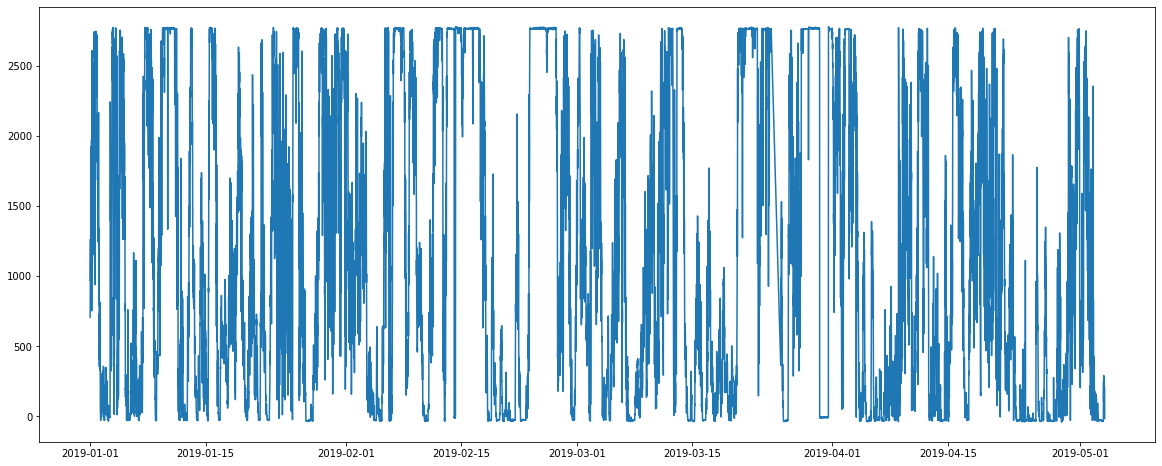

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])

As we can see at the beginning of the year and winter, productivity is a bit low

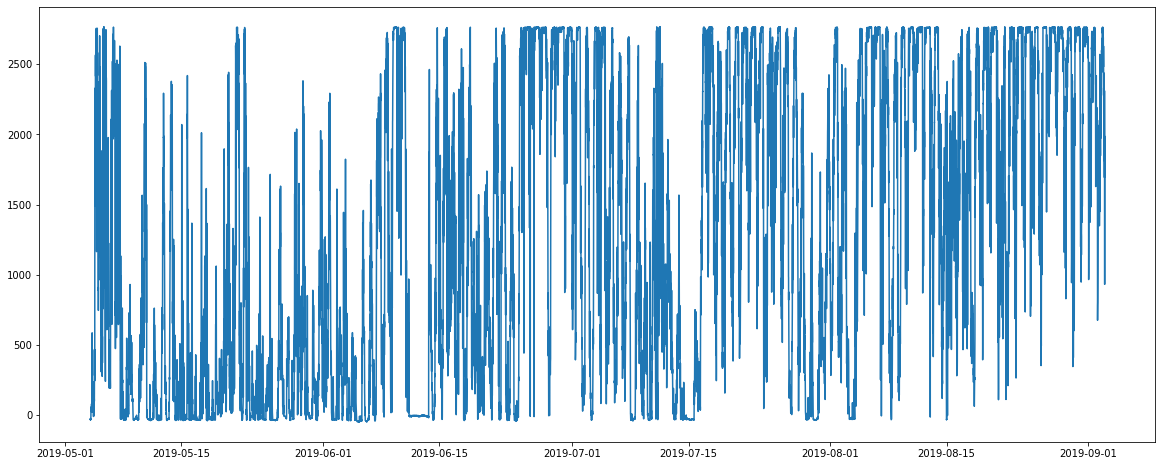

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][round:round*2])

At the end of spring and summer, the productivity of the turbines increases

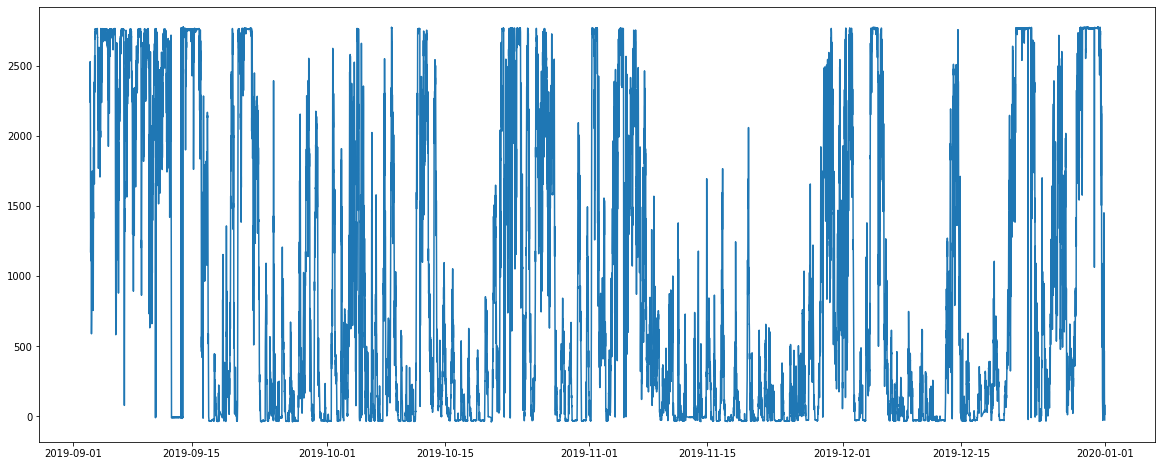

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][round*2:round*3])

At the end of the year and the onset of winter, the production rate decreases, and the turbines are not in their best condition

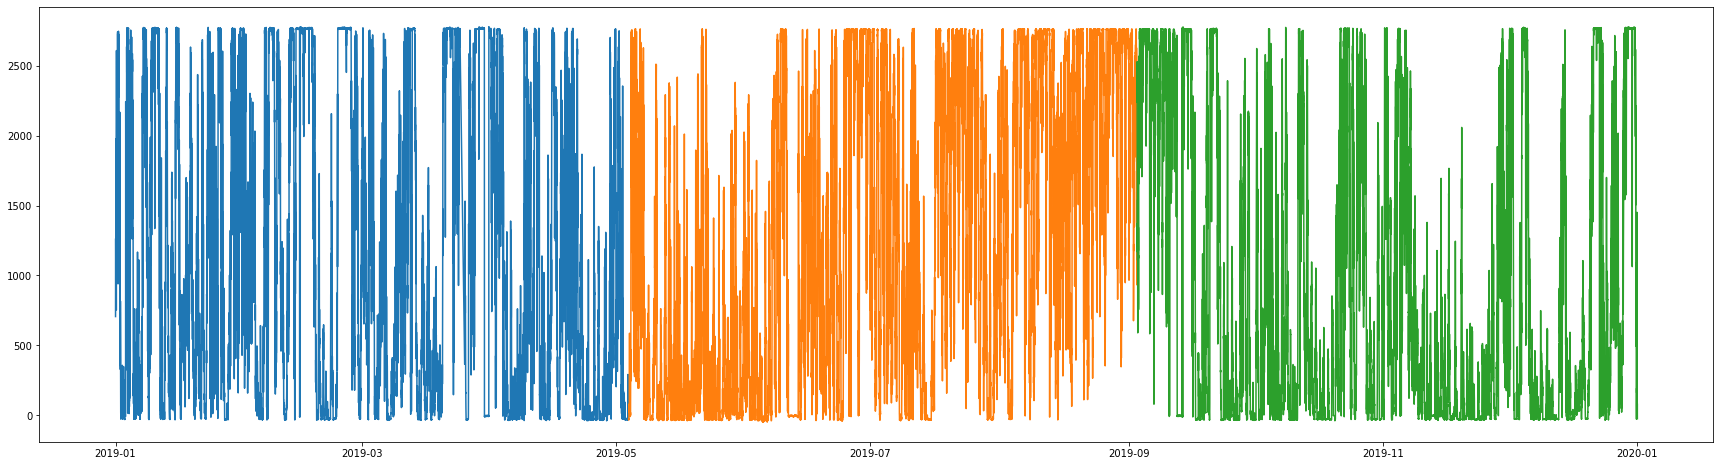

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Power(kW)']][round:round*2])
plt.plot(df_Power_2019[['Power(kW)']][round*2:round*3])

This illustration is very placed between seasons in production

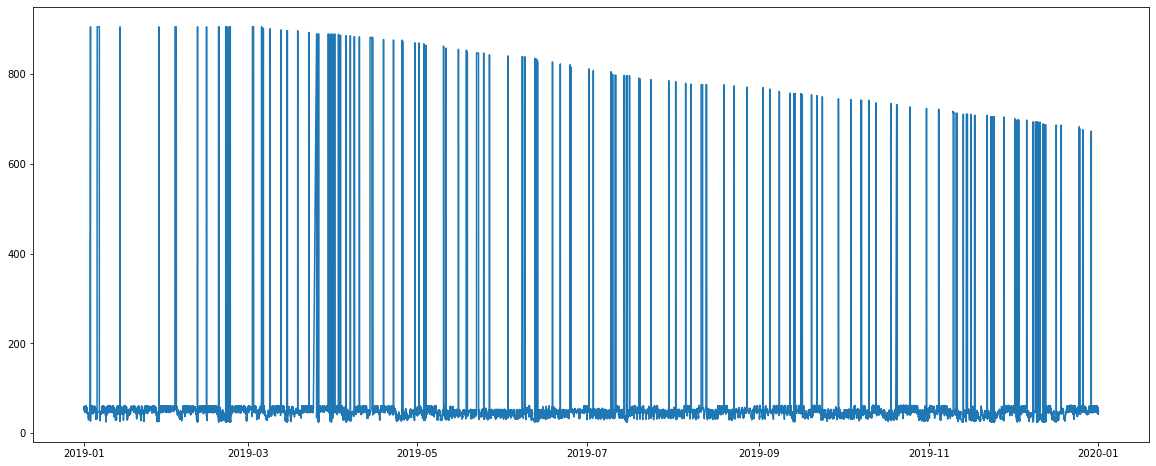

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Gearbox_Distributor_Temperature']])

We moved to what is related to the turbine itself. The gearbox is declining in temperature with the year, but it is in a state of relative stability, and accordingly, on the same line, all the characteristics of the gearbox are affected.

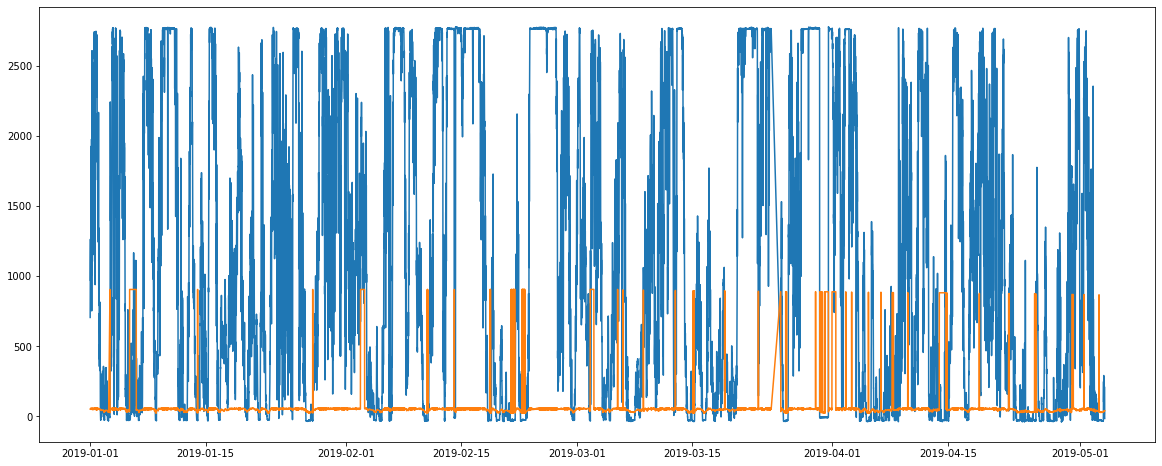

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Gearbox_Distributor_Temperature']][:round])

The increase in the general temperature of the gearbox significantly affects the productivity of the turbines

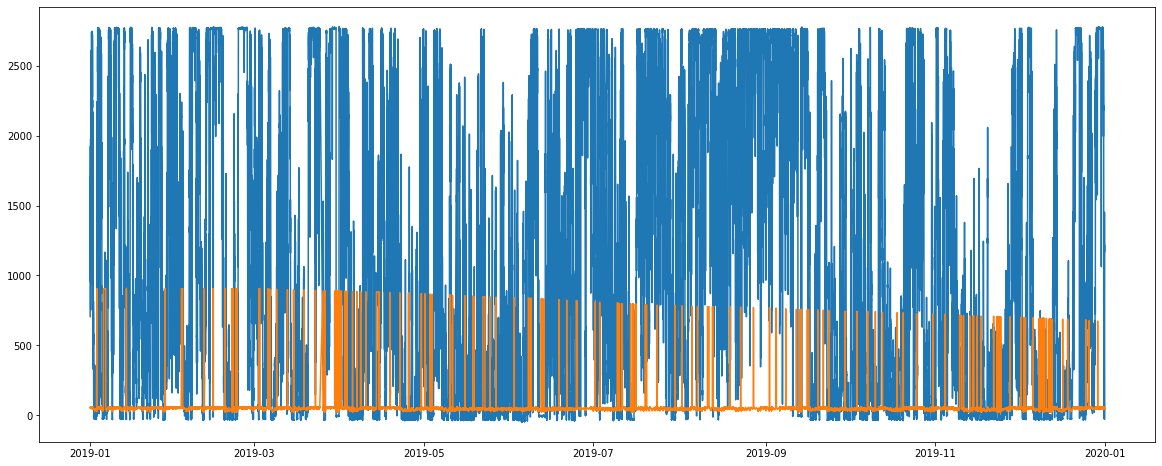

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']])
plt.plot(df_Power_2019[['Gearbox_Distributor_Temperature']])

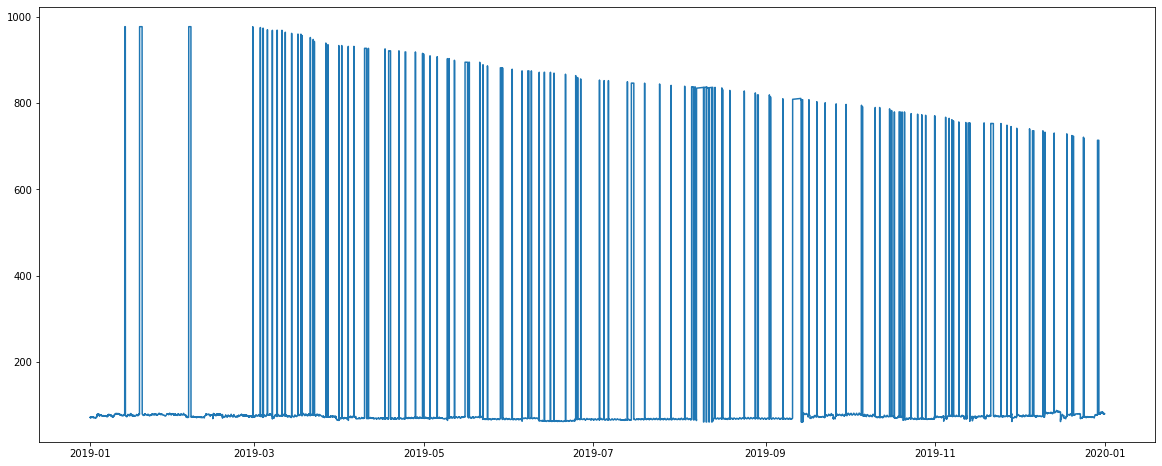

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Hydraulic Prepressure']])

Hydraulic pressure also remains relatively constant but declines throughout the year

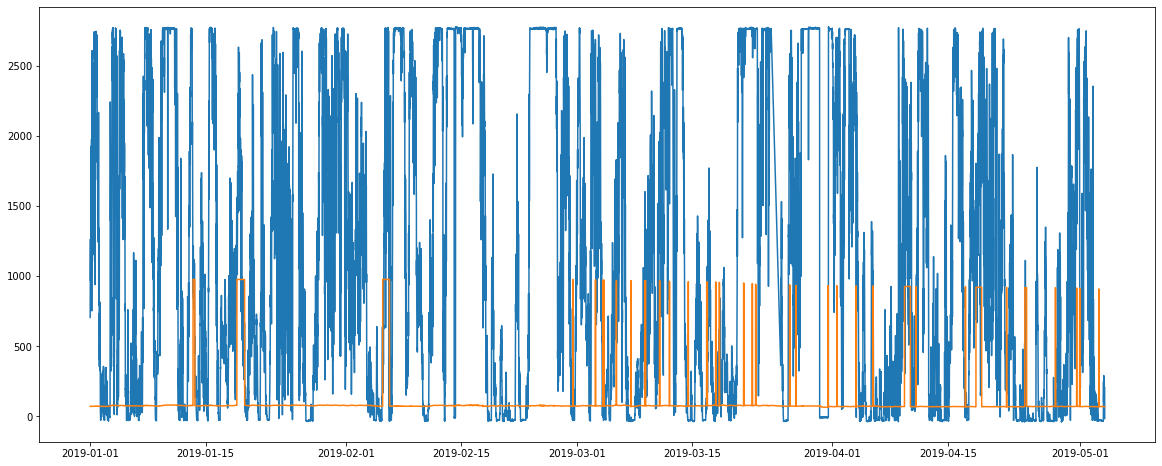

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Hydraulic Prepressure']][:round])

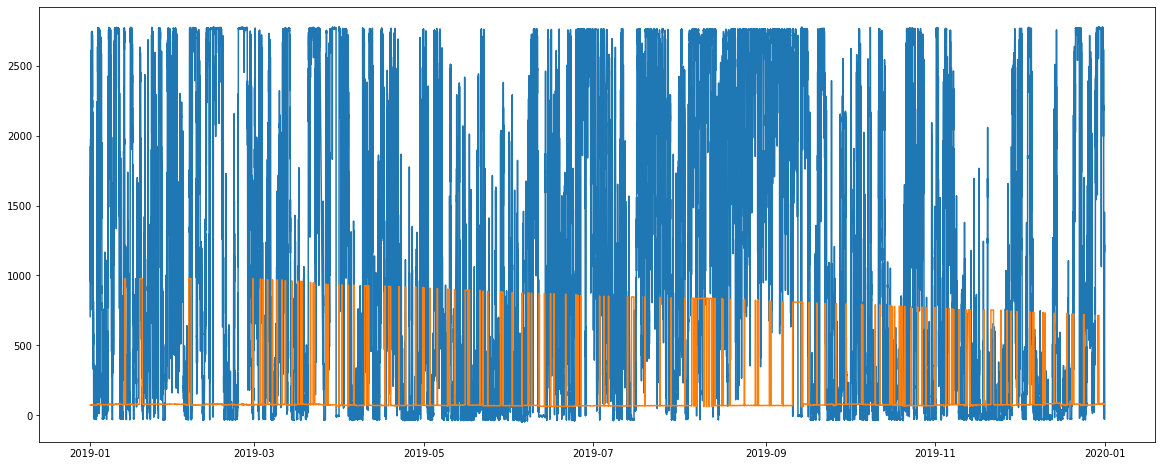

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']])
plt.plot(df_Power_2019[['Hydraulic Prepressure']])

It seems that the increase in hydraulic pressure also affects the production in some way

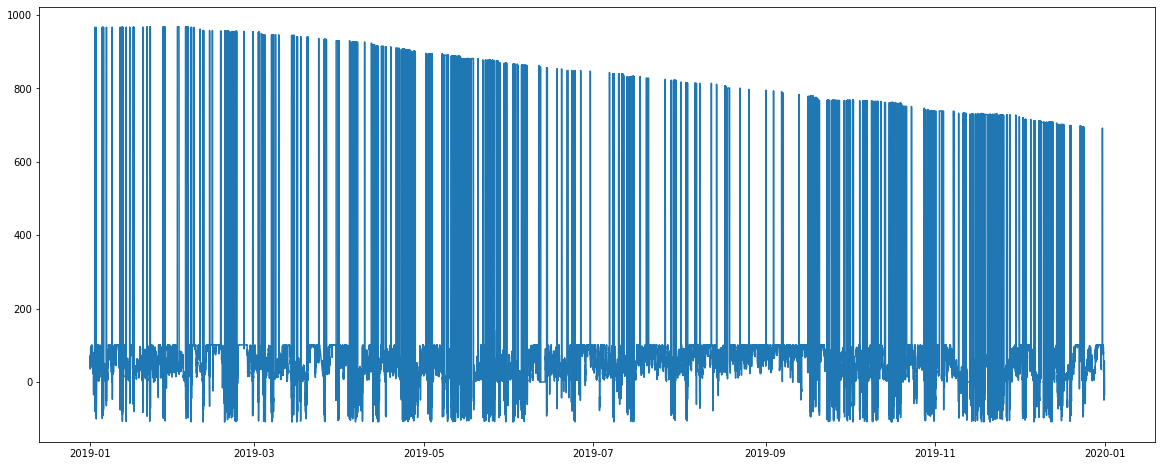

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Torque']])

Here is the torque, which is the main display of wind strength, and it seems to be seasonal as well

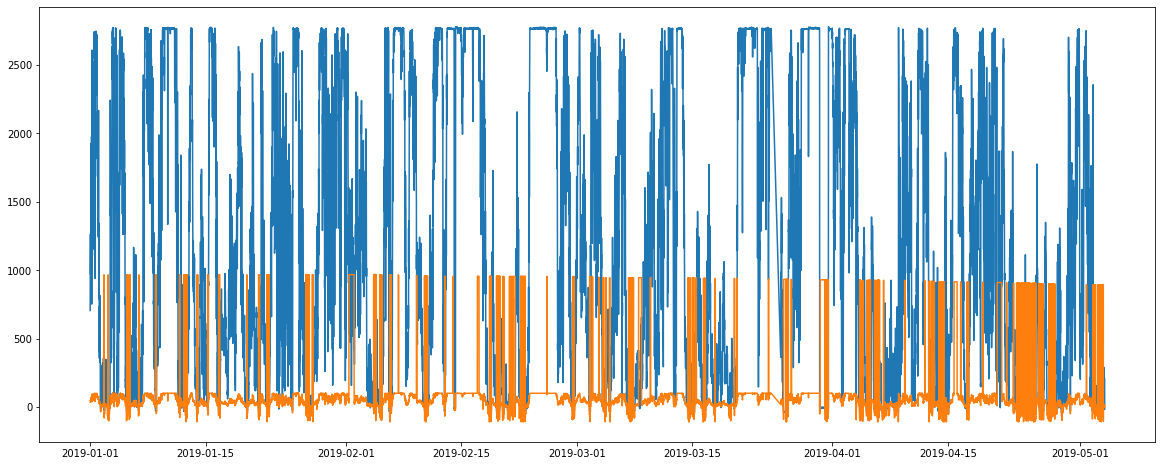

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Torque']][:round])

Contrary to what is expected, the increase in torque does not mean that it increases the productivity of the turbines, perhaps a wrong wind direction, or that the turbines need a certain degree of rotation to reach the best result.

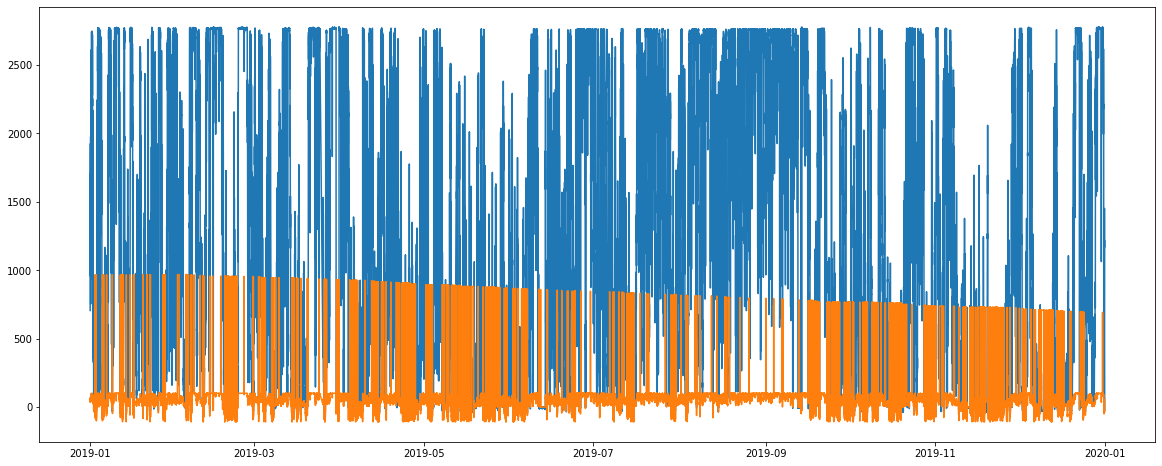

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']])
plt.plot(df_Power_2019[['Torque']])

We note here that the torque appears to increase continuously throughout the year.. but it does not have the first role in increasing productivity

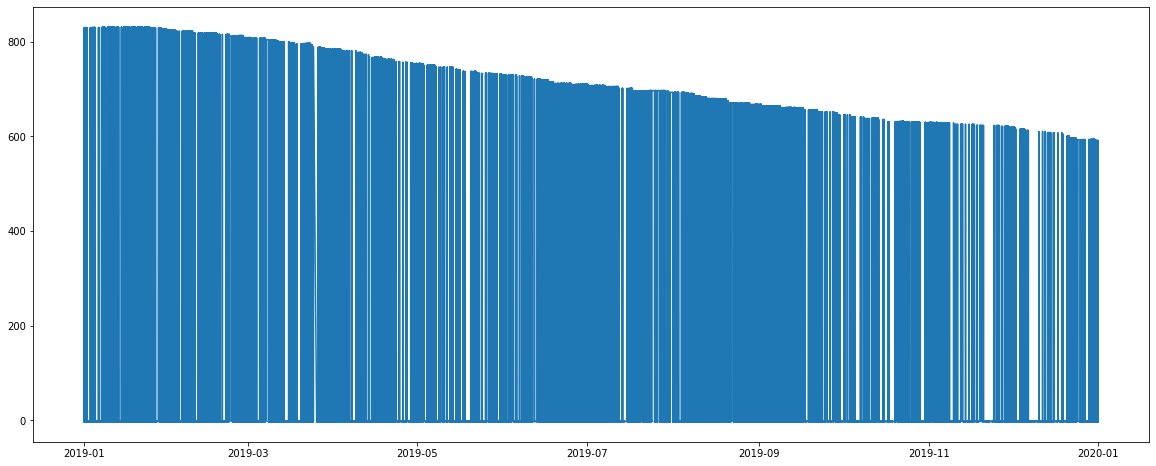

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Tower Accelaration Lateral Raw']])

Tower Accelaration Lateral Raw Stable throughout the year and does not significantly affect productivity

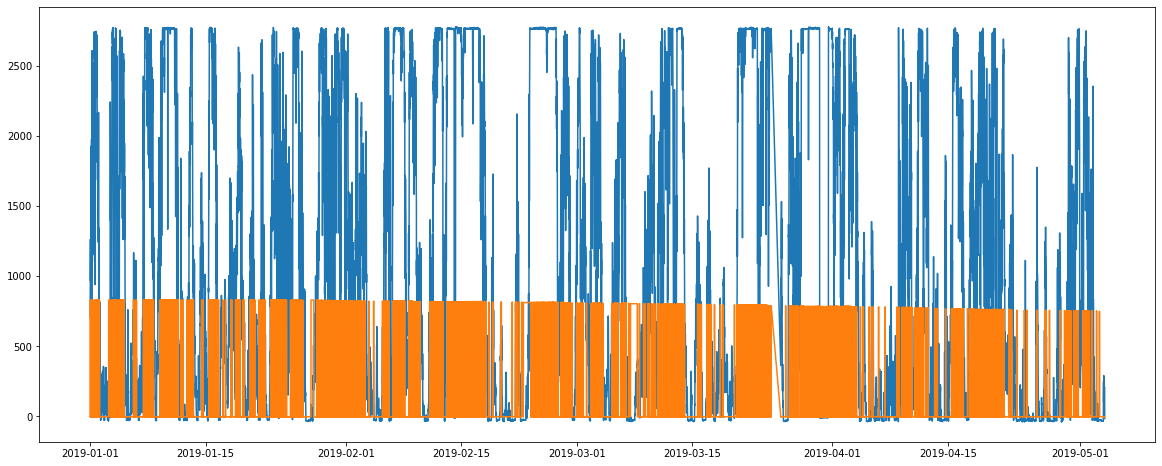

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Tower Accelaration Lateral Raw']][:round])

Note that sometimes that Tower Accelaration Lateral Raw Increasing it increases productivity at exactly the same time

In [ ]:
# 2020
df_Power_2020=features_df.iloc[52123:52123*2 + 188,:]
df_Power_2020['Timestamp'].tail()


104429   2020-12-31 23:10:00
104430   2020-12-31 23:20:00
104431   2020-12-31 23:30:00
104432   2020-12-31 23:40:00
104433   2020-12-31 23:50:00
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
df_Power_2020.reset_index(drop = True,inplace = True)
df_Power_2020.set_index('Timestamp',inplace = True)

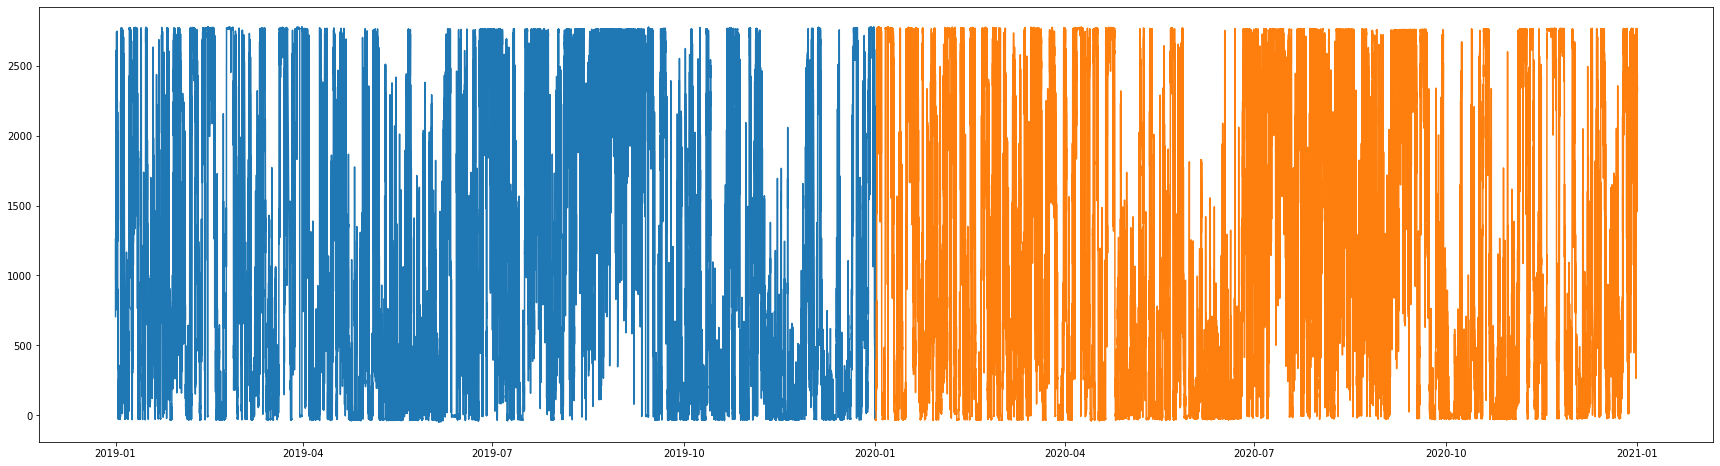

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Power(kW)'])
plt.plot(df_Power_2020['Power(kW)'])

It becomes clear to us that there is seasonality in 2020 as well as 2019, and that productivity increases in the half year and summer period at a higher rate than the rest of the year

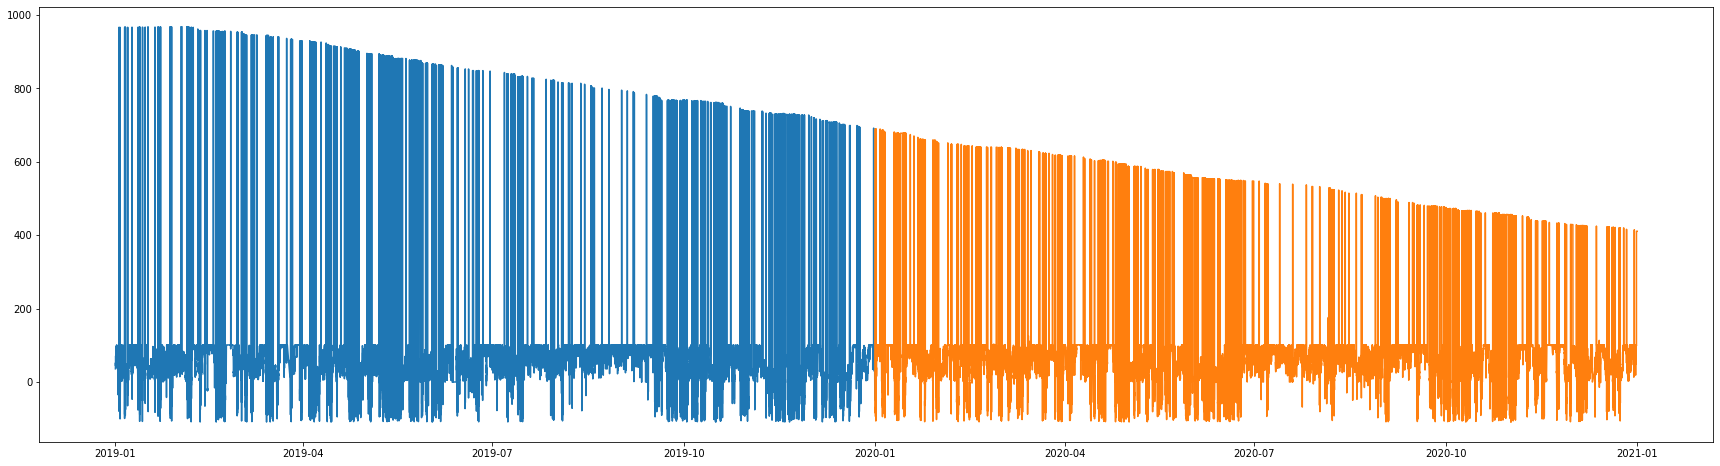

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Torque'])
plt.plot(df_Power_2020['Torque'])

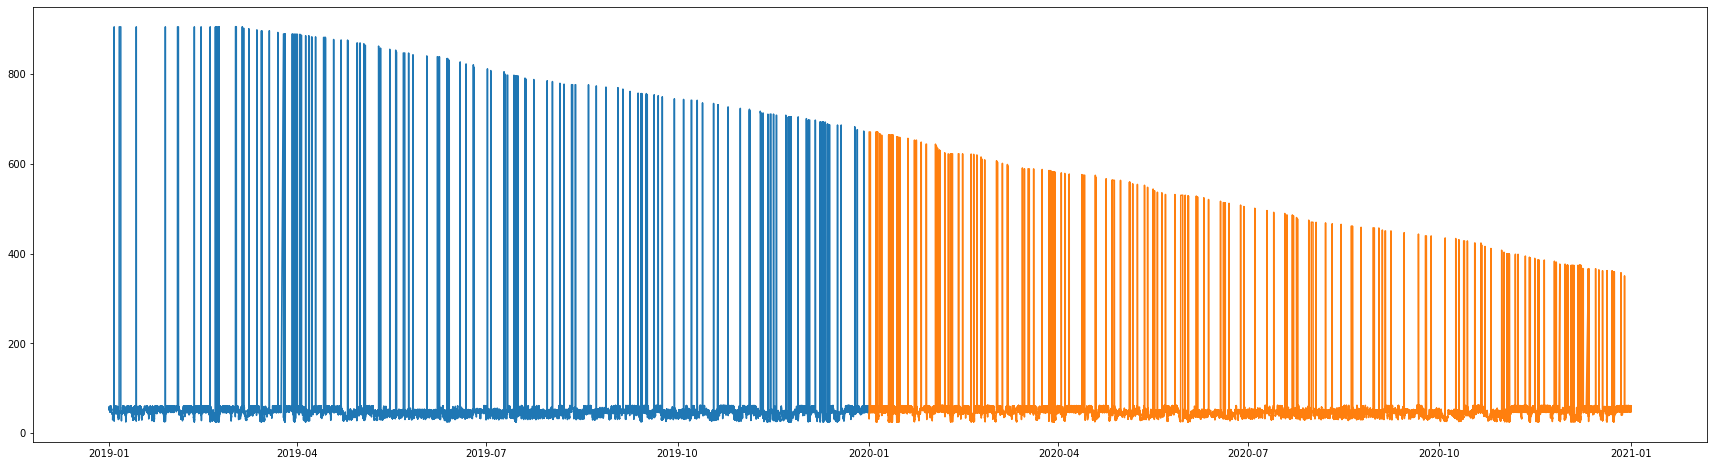

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Gearbox_Distributor_Temperature'])
plt.plot(df_Power_2020['Gearbox_Distributor_Temperature'])

In [ ]:
df_Power_2021=features_df.iloc[52123*2 + 188:136729,:]
df_Power_2021['Timestamp'].tail()


136724   2021-08-14 23:00:00
136725   2021-08-14 23:10:00
136726   2021-08-14 23:20:00
136727   2021-08-14 23:30:00
136728   2021-08-14 23:40:00
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
df_Power_2021.reset_index(drop = True,inplace = True)
df_Power_2021.set_index('Timestamp',inplace = True)

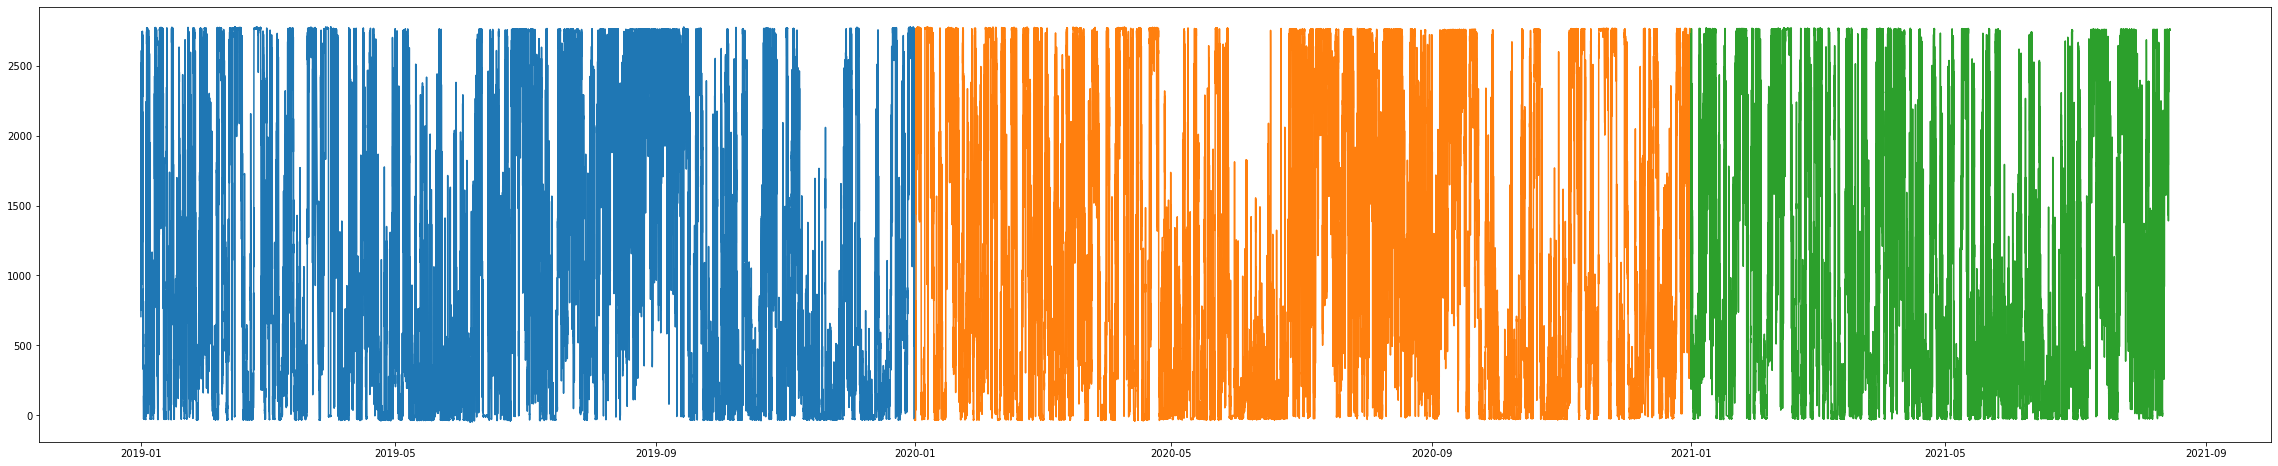

In [ ]:
plt.figure(figsize=(40,8))
plt.plot(df_Power_2019['Power(kW)'])
plt.plot(df_Power_2020['Power(kW)'])
plt.plot(df_Power_2021['Power(kW)'])

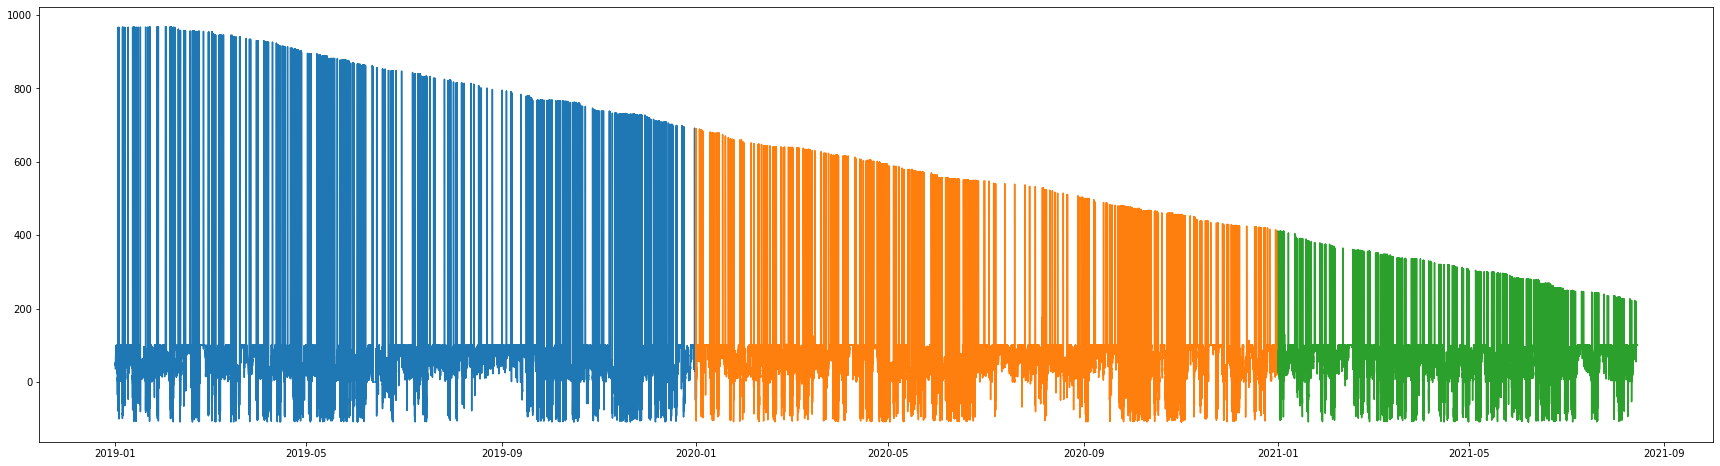

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Torque'])
plt.plot(df_Power_2020['Torque'])
plt.plot(df_Power_2021['Torque'])

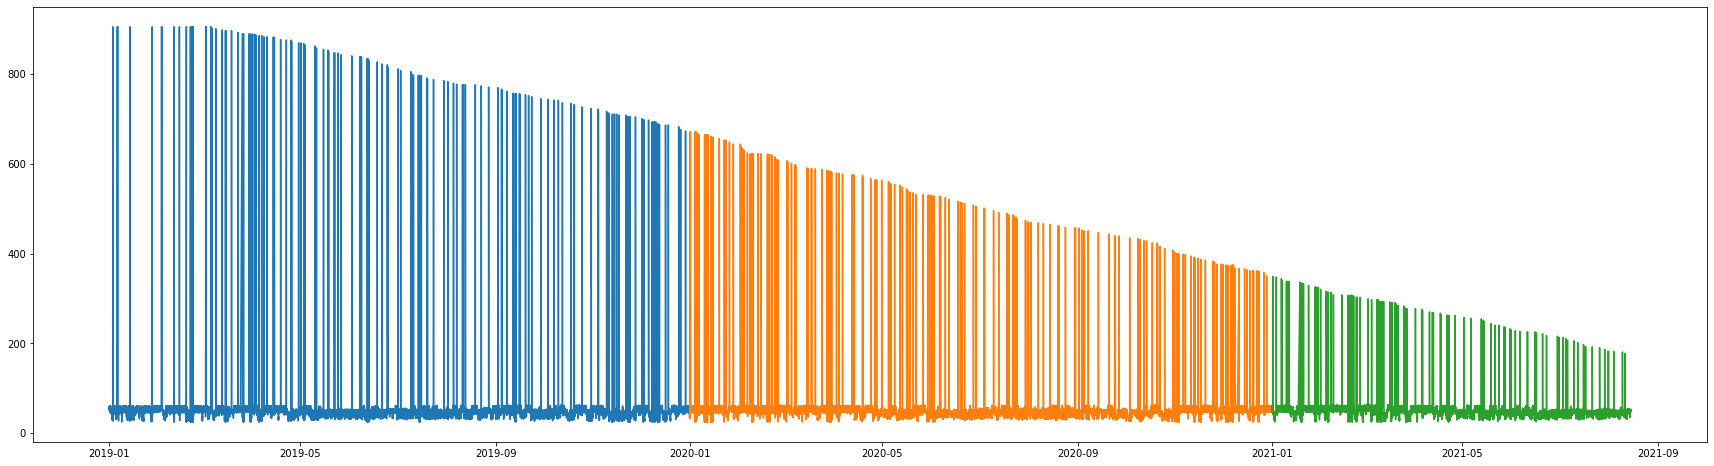

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Gearbox_Distributor_Temperature'])
plt.plot(df_Power_2020['Gearbox_Distributor_Temperature'])
plt.plot(df_Power_2021['Gearbox_Distributor_Temperature'])

# Notes:
1. Seasonality persists over seasons and years in the same turbine capacity to produce consistently with little change
2. Some of the features affecting the work of the turbine are affected by a decrease with time, and this is what makes the change clear, although it is small
3. Perhaps in this way, there is no monitoring of the work of the turbines and no periodic maintenance because the change increases with the increase of years
4. Despite the difference in energy productivity at the level of seasons, it is not trendy or irregular.. the data is running smooth and clear
5. Despite the difference in energy productivity at the level of seasons, it is not trendy or irregular.. the data is running smooth and clear
6. I think that we can make a selection of the features, because there are some features that depend on each other in a purely way, what is any multiplication or the like .. or related to it in another way


# Work on average daily Power

In [ ]:
'2021-08-14 23:50:00'
features_df['Timestamp'][0]

Timestamp('2019-01-01 00:00:00')

In [ ]:
features_df['Timestamp_str']= features_df['Timestamp'].astype(str)


In [ ]:
new_f = [str(value.split(' ')[0]) for value in features_df['Timestamp_str']]
new_f

In [ ]:
features_df['Daily_Timestamp'] =  pd.to_datetime(new_f)

In [ ]:
features_df[['Timestamp','Daily_Timestamp']][280:290]

Timestamp Daily_Timestamp
280 2019-01-02 22:40:00      2019-01-02
281 2019-01-02 22:50:00      2019-01-02
282 2019-01-02 23:00:00      2019-01-02
283 2019-01-02 23:10:00      2019-01-02
284 2019-01-02 23:20:00      2019-01-02
285 2019-01-02 23:30:00      2019-01-02
286 2019-01-02 23:40:00      2019-01-02
287 2019-01-02 23:50:00      2019-01-02
288 2019-01-03 00:00:00      2019-01-03
289 2019-01-03 00:10:00      2019-01-03

In [ ]:
days = features_df['Daily_Timestamp'].unique()

In [ ]:
cols = ['Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature', 'Torque',
       'Converter Control Unit Reactive Power', 'Temperature Trafo-2',
       'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'Voltage C-N', 'Temperature Axis Box-2',
       'Temperature Axis Box-1', 'Voltage B-N', 'Nacelle Position_Degree',
       'Converter Control Unit Voltage', 'Temperature Battery Box-3',
       'Temperature Battery Box-2', 'Temperature Battery Box-1',
       'Hydraulic Prepressure', 'Angle Rotor Position',
       'Temperature Tower Base', 'Pitch Offset-2 Asymmetric Load Controller',
       'Pitch Offset Tower Feedback', 'Line Frequency', 'Internal Power Limit',
       'Circuit Breaker cut-ins', 'Particle Counter',
       'Tower Accelaration Normal Raw', 'Torque Offset Tower Feedback',
       'External Power Limit', 'Blade-2 Actual Value_Angle-B',
       'Blade-1 Actual Value_Angle-B', 'Blade-3 Actual Value_Angle-B',
       'Temperature Heat Exchanger Converter Control Unit',
       'Tower Accelaration Lateral Raw', 'Temperature Ambient',
       'Nacelle Revolution', 'Pitch Offset-1 Asymmetric Load Controller',
       'Tower Deflection', 'Pitch Offset-3 Asymmetric Load Controller',
       'Wind Deviation 1 seconds', 'Wind Deviation 10 seconds',
       'Proxy Sensor_Degree-135', 'State and Fault', 'Proxy Sensor_Degree-225',
       'Blade-3 Actual Value_Angle-A', 'Scope CH 4',
       'Blade-2 Actual Value_Angle-A', 'Blade-1 Actual Value_Angle-A',
       'Blade-2 Set Value_Degree', 'Pitch Demand Baseline_Degree',
       'Blade-1 Set Value_Degree', 'Blade-3 Set Value_Degree',
       'Moment Q Direction', 'Moment Q Filltered', 'Proxy Sensor_Degree-45',
       'Turbine State', 'Proxy Sensor_Degree-315', 'Power(kW)',]

In [ ]:
df_av = pd.DataFrame(columns = features_df.columns)
#df_av.reset_index(inplace = True)
df_av.drop(columns = ['Timestamp_str','Daily_Timestamp'],inplace = True)
df_av

Empty DataFrame
Columns: [Timestamp, Gearbox_T1_High_Speed_Shaft_Temperature, Gearbox_T3_High_Speed_Shaft_Temperature, Gearbox_T1_Intermediate_Speed_Shaft_Temperature, Temperature Gearbox Bearing Hollow Shaft, Tower Acceleration Normal, Gearbox_Oil-2_Temperature, Tower Acceleration Lateral, Temperature Bearing_A, Temperature Trafo-3, Gearbox_T3_Intermediate_Speed_Shaft_Temperature, Gearbox_Oil-1_Temperature, Gearbox_Oil_Temperature, Torque, Converter Control Unit Reactive Power, Temperature Trafo-2, Reactive Power, Temperature Shaft Bearing-1, Gearbox_Distributor_Temperature, Moment D Filtered, Moment D Direction, N-set 1, Operating State, Power Factor, Temperature Shaft Bearing-2, Temperature_Nacelle, Voltage A-N, Temperature Axis Box-3, Voltage C-N, Temperature Axis Box-2, Temperature Axis Box-1, Voltage B-N, Nacelle Position_Degree, Converter Control Unit Voltage, Temperature Battery Box-3, Temperature Battery Box-2, Temperature Battery Box-1, Hydraulic Prepressure, Angle Rotor Position, Temperature Tower Base, Pitch Offset-2 Asymmetric Load Controller, Pitch Offset Tower Feedback, Line Frequency, Internal Power Limit, Circuit Breaker cut-ins, Particle Counter, Tower Accelaration Normal Raw, Torque Offset Tower Feedback, External Power Limit, Blade-2 Actual Value_Angle-B, Blade-1 Actual Value_Angle-B, Blade-3 Actual Value_Angle-B, Temperature Heat Exchanger Converter Control Unit, Tower Accelaration Lateral Raw, Temperature Ambient, Nacelle Revolution, Pitch Offset-1 Asymmetric Load Controller, Tower Deflection, Pitch Offset-3 Asymmetric Load Controller, Wind Deviation 1 seconds, Wind Deviation 10 seconds, Proxy Sensor_Degree-135, State and Fault, Proxy Sensor_Degree-225, Blade-3 Actual Value_Angle-A, Scope CH 4, Blade-2 Actual Value_Angle-A, Blade-1 Actual Value_Angle-A, Blade-2 Set Value_Degree, Pitch Demand Baseline_Degree, Blade-1 Set Value_Degree, Blade-3 Set Value_Degree, Moment Q Direction, Moment Q Filltered, Proxy Sensor_Degree-45, Turbine State, Proxy Sensor_Degree-315, Power(kW)]
Index: []

[0 rows x 78 columns]

In [ ]:
for i in days : 
  data = features_df[features_df['Timestamp']==i].iloc[:136729,:]
  av_row = []
  av_row.append(i)
  for j in cols :
   av = data[j].mean()
   av_row.append(float(av))
  df_av.loc[len(df_av)] = av_row


In [ ]:
features_df.loc[(144*30*2)+(144*22):(144*30*3)-(144*4)]

Timestamp  Gearbox_T1_High_Speed_Shaft_Temperature  \
11808 2019-03-24 03:30:00                                67.256668   
11809 2019-03-24 03:40:00                                66.540001   
11810 2019-03-24 03:50:00                                67.050003   
11811 2019-03-24 04:00:00                                61.793335   
11812 2019-03-24 04:10:00                                62.599998   
...                   ...                                      ...   
12380 2019-03-29 06:20:00                                65.213333   
12381 2019-03-29 06:30:00                                64.303337   
12382 2019-03-29 06:40:00                                64.096664   
12383 2019-03-29 06:50:00                                64.190002   
12384 2019-03-29 07:00:00                                63.310001   

       Gearbox_T3_High_Speed_Shaft_Temperature  \
11808                                69.025002   
11809                                69.000000   
11810                                69.106667   
11811                                66.510002   
11812                                64.983330   
...                                        ...   
12380                                67.514999   
12381                                67.000000   
12382                                66.768333   
12383                                66.823334   
12384                                66.000000   

       Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
11808                                        62.541668   
11809                                        62.278332   
11810                                        62.413334   
11811                                        59.571667   
11812                                        58.275002   
...                                                ...   
12380                                        60.994999   
12381                                        60.038334   
12382                                        59.590000   
12383                                        59.451668   
12384                                        58.955002   

       Temperature Gearbox Bearing Hollow Shaft  Tower Acceleration Normal  \
11808                                 65.633331                 152.028839   
11809                                 65.346664                 137.258545   
11810                                 65.481667                 141.920929   
11811                                 63.261665                 135.773529   
11812                                 60.990002                 117.197716   
...                                         ...                        ...   
12380                                 64.278336                 852.942428   
12381                                 63.375000                 852.946551   
12382                                 63.000000                 852.950621   
12383                                 63.000000                 852.954689   
12384                                 62.106667                 852.958775   

       Gearbox_Oil-2_Temperature  Tower Acceleration Lateral  \
11808                  67.320000                   64.773247   
11809                  66.903336                   64.747063   
11810                  67.173332                   69.460228   
11811                  63.404999                   65.979996   
11812                  63.026669                   56.125237   
...                          ...                         ...   
12380                  65.518333                  918.859727   
12381                  64.728333                  918.864944   
12382                  64.386665                  918.870193   
12383                  64.425003                  918.875420   
12384                  63.759998                  918.880664   

       Temperature Bearing_A  Temperature Trafo-3  ...  \
11808              42.855000            67.193336  ...   
11809              43.000000            69.896667  ... 

In [ ]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Timestamp                                          1079 non-null   datetime64[ns]
 1   Gearbox_T1_High_Speed_Shaft_Temperature            1076 non-null   object        
 2   Gearbox_T3_High_Speed_Shaft_Temperature            1076 non-null   object        
 3   Gearbox_T1_Intermediate_Speed_Shaft_Temperature    1076 non-null   object        
 4   Temperature Gearbox Bearing Hollow Shaft           1076 non-null   object        
 5   Tower Acceleration Normal                          1076 non-null   object        
 6   Gearbox_Oil-2_Temperature                          1076 non-null   object        
 7   Tower Acceleration Lateral                         1076 non-null   object        
 8   Temperature Bearin

In [ ]:
df_av['Power(kW)'].dropna(inplace = True)

In [ ]:
for i in range(1,len(df_av.columns)) : 
      df_av[df_av.columns[i]].fillna(df_av[df_av.columns[i]].mode(),inplace = True )
df_av.isna().sum()  

Timestamp                                            0
Gearbox_T1_High_Speed_Shaft_Temperature              3
Gearbox_T3_High_Speed_Shaft_Temperature              3
Gearbox_T1_Intermediate_Speed_Shaft_Temperature      3
Temperature Gearbox Bearing Hollow Shaft             3
                                                  ... 
Moment Q Filltered                                   0
Proxy Sensor_Degree-45                               0
Turbine State                                        3
Proxy Sensor_Degree-315                              3
Power(kW)                                          125
Length: 78, dtype: int64

In [ ]:
for i in cols:
   df_av[i]= pd.to_numeric(df_av[i])
   

In [ ]:
df_av.loc[365:365*2]

Timestamp  Gearbox_T1_High_Speed_Shaft_Temperature  \
365 2020-01-01                                44.860001   
366 2020-01-02                                67.000000   
367 2020-01-03                                63.191666   
368 2020-01-04                                63.026669   
369 2020-01-05                                38.963333   
..         ...                                      ...   
726 2020-12-27                                64.076668   
727 2020-12-28                                45.408333   
728 2020-12-29                                66.294998   
729 2020-12-30                                68.000000   
730 2020-12-31                                67.000000   

     Gearbox_T3_High_Speed_Shaft_Temperature  \
365                                48.000000   
366                                68.896667   
367                                65.421669   
368                                65.904999   
369                                40.911667   
..                                       ...   
726                                66.496666   
727                                47.463333   
728                                67.623337   
729                                69.000000   
730                               360.438545   

     Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
365                                        43.000000   
366                                        60.544998   
367                                        57.676666   
368                                        57.996666   
369                                        36.000000   
..                                               ...   
726                                        59.256668   
727                                        40.431667   
728                                        60.130001   
729                                        62.000000   
730                                        61.008335   

     Temperature Gearbox Bearing Hollow Shaft  Tower Acceleration Normal  \
365                                 50.276669                  14.808953   
366                                 65.246666                 106.849854   
367                                 61.336666                 145.318497   
368                                 63.494999                  46.764824   
369                                 40.938332                  16.087851   
..                                        ...                        ...   
726                                 62.521667                  43.118568   
727                                 47.196667                  59.330231   
728                                 64.125000                  44.872223   
729                                 65.660004                  29.594036   
730                                 65.000000                 368.012126   

     Gearbox_Oil-2_Temperature  Tower Acceleration Lateral  \
365                  48.618332                   15.074389   
366                  67.000000                   52.493408   
367                  63.326668                   64.127121   
368                  63.461666                   26.892656   
369                  40.000000                   11.290960   
..                         ...                         ...   
726                  64.144997                   31.565914   
727                  46.994999                   33.596046   
728                  65.998337                   39.752354   
729                  67.098335                   31.677967   
730                  66.529999                   32.791904   

     Temperature Bearing_A  Temperature Trafo-3  ...  \
365              23.828333            46.000000  ...   
366              38.000000           649.681554  ...   
367              39.000000            73.139999  ...   
368              33.000000            52.514999  ...   
369              21.000000            44.000000  ...   
..                     ...                  ...  ...

In [ ]:
df_av.set_index('Timestamp',inplace = True)

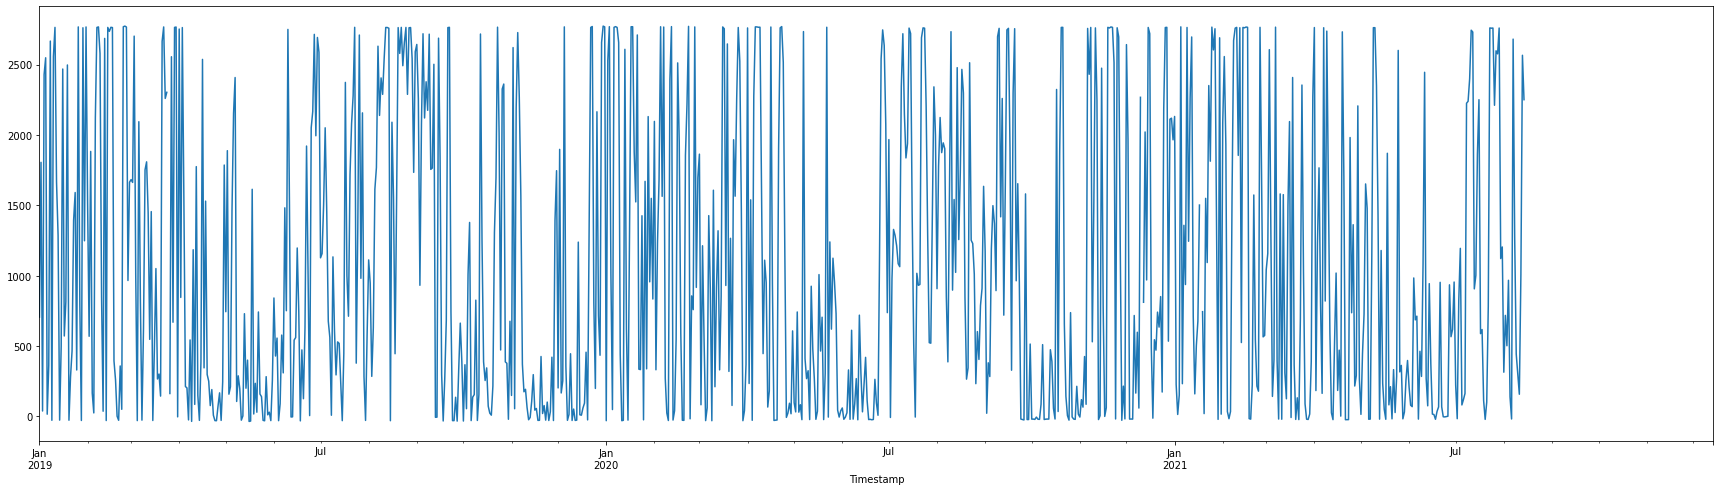

In [ ]:
plt.figure(figsize=(30,8))
df_av['Power(kW)'].plot()

In [ ]:
# 2019
df_av_2019=df_av.iloc[0:365,:]
df_av_2019.tail()

Gearbox_T1_High_Speed_Shaft_Temperature  \
Timestamp                                             
2019-12-27                                61.023335   
2019-12-28                                51.000000   
2019-12-29                                64.351669   
2019-12-30                                61.188332   
2019-12-31                                61.845001   

            Gearbox_T3_High_Speed_Shaft_Temperature  \
Timestamp                                             
2019-12-27                                64.044998   
2019-12-28                                54.003334   
2019-12-29                                66.245003   
2019-12-30                                65.041664   
2019-12-31                                65.718330   

            Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
Timestamp                                                     
2019-12-27                                        56.413334   
2019-12-28                                        46.000000   
2019-12-29                                        57.939999   
2019-12-30                                        56.991665   
2019-12-31                                       685.076477   

            Temperature Gearbox Bearing Hollow Shaft  \
Timestamp                                              
2019-12-27                                 61.718334   
2019-12-28                                 53.328335   
2019-12-29                                 62.055000   
2019-12-30                                 61.119999   
2019-12-31                                 62.154999   

            Tower Acceleration Normal  Gearbox_Oil-2_Temperature  \
Timestamp                                                          
2019-12-27                  53.680031                  61.486668   
2019-12-28                  24.866266                  53.000000   
2019-12-29                  83.330360                  64.514999   
2019-12-30                 149.980179                  62.178333   
2019-12-31                 634.206324                 649.639297   

            Tower Acceleration Lateral  Temperature Bearing_A  \
Timestamp                                                       
2019-12-27                   25.805086              35.776669   
2019-12-28                   15.153484              25.988333   
2019-12-29                   40.246704              40.000000   
2019-12-30                   67.627655              39.000000   
2019-12-31                  679.964003              46.529999   

            Temperature Trafo-3  \
Timestamp                         
2019-12-27            53.938332   
2019-12-28            46.000000   
2019-12-29            56.813332   
2019-12-30            75.169998   
2019-12-31            60.000000   

            Gearbox_T3_Intermediate_Speed_Shaft_Temperature  ...  \
Timestamp                                                    ...   
2019-12-27                                        61.716667  ...   
2019-12-28                                        53.326668  ...   
2019-12-29                                        62.055000  ...   
2019-12-30                                        61.119999  ...   
2019-12-31                                        62.153332  ...   

            Blade-2 Set Value_Degree  Pitch Demand Baseline_Degree  \
Timestamp                                                            
2019-12-27                  0.643975                      0.000000   
2019-12-28                  0.660564                      0.000000   
2019-12-29                  5.512230                      4.878018   
2019-12-30                 14.595162                     13.968026   
2019-12-31                683.328315                     18.623245   

            Blade-1 Set Value_Degree  Blade-3 Set Value_Degree  \
Timestamp                                                        
2019-12-27                  0.036748                 -0.680722   
2019-12-28                  0.017526                 -0.6780

In [ ]:
df_av_2020=df_av.iloc[365:365*2+1]
df_av_2020.tail()

Gearbox_T1_High_Speed_Shaft_Temperature  \
Timestamp                                             
2020-12-27                                64.076668   
2020-12-28                                45.408333   
2020-12-29                                66.294998   
2020-12-30                                68.000000   
2020-12-31                                67.000000   

            Gearbox_T3_High_Speed_Shaft_Temperature  \
Timestamp                                             
2020-12-27                                66.496666   
2020-12-28                                47.463333   
2020-12-29                                67.623337   
2020-12-30                                69.000000   
2020-12-31                               360.438545   

            Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
Timestamp                                                     
2020-12-27                                        59.256668   
2020-12-28                                        40.431667   
2020-12-29                                        60.130001   
2020-12-30                                        62.000000   
2020-12-31                                        61.008335   

            Temperature Gearbox Bearing Hollow Shaft  \
Timestamp                                              
2020-12-27                                 62.521667   
2020-12-28                                 47.196667   
2020-12-29                                 64.125000   
2020-12-30                                 65.660004   
2020-12-31                                 65.000000   

            Tower Acceleration Normal  Gearbox_Oil-2_Temperature  \
Timestamp                                                          
2020-12-27                  43.118568                  64.144997   
2020-12-28                  59.330231                  46.994999   
2020-12-29                  44.872223                  65.998337   
2020-12-30                  29.594036                  67.098335   
2020-12-31                 368.012126                  66.529999   

            Tower Acceleration Lateral  Temperature Bearing_A  \
Timestamp                                                       
2020-12-27                   31.565914              59.686668   
2020-12-28                   33.596046              24.000000   
2020-12-29                   39.752354              56.000000   
2020-12-30                   31.677967              42.310001   
2020-12-31                   32.791904              44.993332   

            Temperature Trafo-3  \
Timestamp                         
2020-12-27            80.258331   
2020-12-28            55.000000   
2020-12-29            67.000000   
2020-12-30            75.540001   
2020-12-31            55.000000   

            Gearbox_T3_Intermediate_Speed_Shaft_Temperature  ...  \
Timestamp                                                    ...   
2020-12-27                                        62.521667  ...   
2020-12-28                                        47.196667  ...   
2020-12-29                                        64.125000  ...   
2020-12-30                                        65.660004  ...   
2020-12-31                                        65.000000  ...   

            Blade-2 Set Value_Degree  Pitch Demand Baseline_Degree  \
Timestamp                                                            
2020-12-27                 10.610133                      9.980694   
2020-12-28                  0.643716                      0.000000   
2020-12-29                  1.428712                      0.780959   
2020-12-30                  1.474478                      0.822209   
2020-12-31                  0.664196                      0.020865   

            Blade-1 Set Value_Degree  Blade-3 Set Value_Degree  \
Timestamp                                                        
2020-12-27                 10.021709                  9.309452   
2020-12-28                  0.032820                 -0.6765

In [ ]:
df_av_2021=df_av.iloc[365*2+1:]
df_av_2021.tail()

Gearbox_T1_High_Speed_Shaft_Temperature  \
Timestamp                                             
2021-12-10                                66.933334   
2021-12-11                                60.139999   
2021-12-12                                73.227951   
2021-12-13                                55.908333   
2021-12-14                                35.983334   

            Gearbox_T3_High_Speed_Shaft_Temperature  \
Timestamp                                             
2021-12-10                                67.521667   
2021-12-11                                62.143333   
2021-12-12                                67.841667   
2021-12-13                                58.994999   
2021-12-14                                38.000000   

            Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
Timestamp                                                     
2021-12-10                                        60.721668   
2021-12-11                                        55.639999   
2021-12-12                                        60.523335   
2021-12-13                                        52.935001   
2021-12-14                                        34.169998   

            Temperature Gearbox Bearing Hollow Shaft  \
Timestamp                                              
2021-12-10                                 63.903332   
2021-12-11                                 59.741665   
2021-12-12                                 64.629997   
2021-12-13                                 57.415001   
2021-12-14                                 72.028451   

            Tower Acceleration Normal  Gearbox_Oil-2_Temperature  \
Timestamp                                                          
2021-12-10                  53.999798                  66.074997   
2021-12-11                  49.854202                  79.635001   
2021-12-12                  63.492569                  64.761665   
2021-12-13                  52.050186                  56.676666   
2021-12-14                  12.851683                  38.038334   

            Tower Acceleration Lateral  Temperature Bearing_A  \
Timestamp                                                       
2021-12-10                   41.281544              59.000000   
2021-12-11                   35.362526              47.466667   
2021-12-12                   39.996235              41.000000   
2021-12-13                   27.004709              37.330002   
2021-12-14                    7.402071              24.000000   

            Temperature Trafo-3  \
Timestamp                         
2021-12-10            84.419282   
2021-12-11            67.146667   
2021-12-12            75.426666   
2021-12-13            58.105000   
2021-12-14            49.000000   

            Gearbox_T3_Intermediate_Speed_Shaft_Temperature  ...  \
Timestamp                                                    ...   
2021-12-10                                        63.903332  ...   
2021-12-11                                        59.738335  ...   
2021-12-12                                        64.629997  ...   
2021-12-13                                        57.415001  ...   
2021-12-14                                        73.741432  ...   

            Blade-2 Set Value_Degree  Pitch Demand Baseline_Degree  \
Timestamp                                                            
2021-12-10                  2.586537                      1.976013   
2021-12-11                111.656294                      0.000667   
2021-12-12                  3.904524                      3.294875   
2021-12-13                  0.621443                      0.000259   
2021-12-14                  0.613166                      0.007510   

            Blade-1 Set Value_Degree  Blade-3 Set Value_Degree  \
Timestamp                                                        
2021-12-10                  2.076872                  1.262723   
2021-12-11                  0.082499                 -0.6898

In [ ]:
df_av_2019.columns

Index(['Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature', 'Torque',
       'Converter Control Unit Reactive Power', 'Temperature Trafo-2',
       'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'Voltage C-N', 'Temperature Axis Box-2',
       'Temperature Axis Box-1', 'Voltage B-N', 'Nacelle Position_Degree',
       'Converter Co

<Figure size 576x288 with 0 Axes>

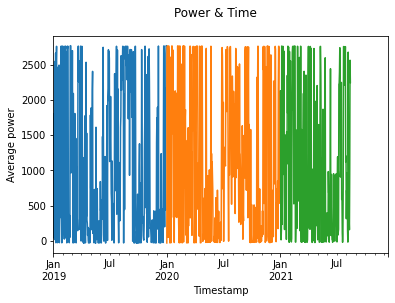

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
fig, ax1,  = plt.subplots()
fig.suptitle('Power & Time')
ax1.set_ylabel('Average power')
df_av_2019['Power(kW)'].plot()
df_av_2020['Power(kW)'].plot()
df_av_2021['Power(kW)'].plot()

<Figure size 468x288 with 0 Axes>

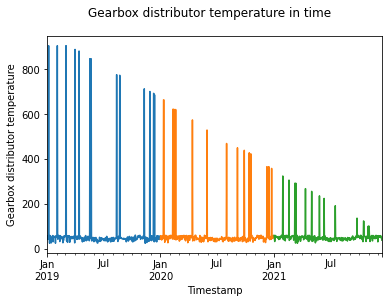

In [ ]:
plt.figure(figsize=(6.5,4))
fig, ax1,  = plt.subplots()
fig.suptitle('Gearbox distributor temperature in time')
ax1.set_ylabel('Gearbox distributor temperature')
df_av_2019['Gearbox_Distributor_Temperature'].plot()
df_av_2020['Gearbox_Distributor_Temperature'].plot()
df_av_2021['Gearbox_Distributor_Temperature'].plot()

<Figure size 468x288 with 0 Axes>

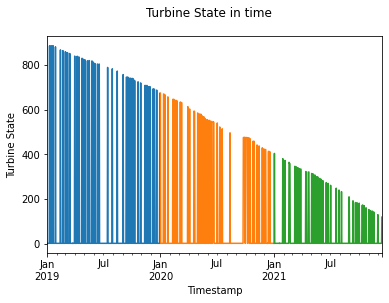

In [ ]:
plt.figure(figsize=(6.5,4))
fig, ax1,  = plt.subplots()
fig.suptitle('Turbine State in time')
ax1.set_ylabel('Turbine State')
df_av_2019['Turbine State'].plot()
df_av_2020['Turbine State'].plot()
df_av_2021['Turbine State'].plot()

<Figure size 468x288 with 0 Axes>

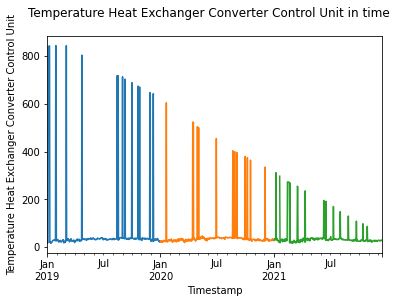

In [ ]:
plt.figure(figsize=(6.5,4))
fig, ax1,  = plt.subplots()
fig.suptitle('Temperature Heat Exchanger Converter Control Unit in time')
ax1.set_ylabel('Temperature Heat Exchanger Converter Control Unit')
df_av_2019['Temperature Heat Exchanger Converter Control Unit'].plot()
df_av_2020['Temperature Heat Exchanger Converter Control Unit'].plot()
df_av_2021['Temperature Heat Exchanger Converter Control Unit'].plot()

<Figure size 468x288 with 0 Axes>

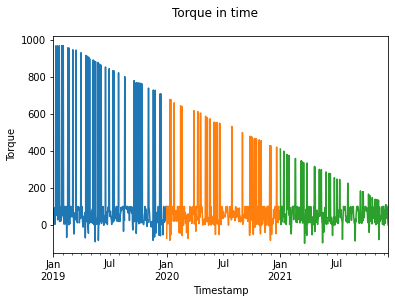

In [ ]:
plt.figure(figsize=(6.5,4))
fig, ax1,  = plt.subplots()
fig.suptitle('Torque in time')
ax1.set_ylabel('Torque')
df_av_2019['Torque'].plot()
df_av_2020['Torque'].plot()
df_av_2021['Torque'].plot()

<Figure size 468x576 with 0 Axes>

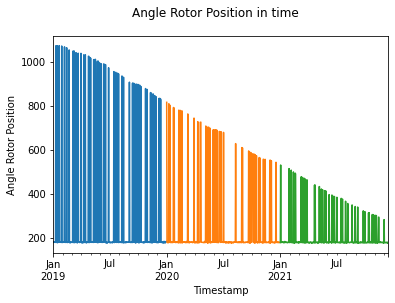

In [ ]:
# Tower Accelaration Lateral Raw
plt.figure(figsize=(6.5,8))
fig, ax1,  = plt.subplots()
fig.suptitle('Angle Rotor Position in time')
ax1.set_ylabel('Angle Rotor Position')
df_av_2019['Angle Rotor Position'].plot()
df_av_2020['Angle Rotor Position'].plot()
df_av_2021['Angle Rotor Position'].plot()

In [ ]:
df_av_2019['Power(kW)'].fillna(df_av_2019['Power(kW)'].mean(),inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#1)Determine Rolling statistics

rolmean = df_av['Power(kW)'].rolling(window=2).mean() #window size 12 denotes 12 months
rolstd = df_av['Power(kW)'].rolling(window=2).std() #window size 12 denotes 12 months
print(rolmean , rolstd)

Timestamp
2019-01-01            NaN
2019-01-02    1255.610016
2019-01-03     922.055859
2019-01-04    1233.985485
2019-01-05    2488.708008
                 ...     
2021-12-10            NaN
2021-12-11            NaN
2021-12-12            NaN
2021-12-13            NaN
2021-12-14            NaN
Name: Power(kW), Length: 1079, dtype: float64 Timestamp
2019-01-01            NaN
2019-01-02     777.440385
2019-01-03    1249.157198
2019-01-04    1690.292306
2019-01-05      84.153303
                 ...     
2021-12-10            NaN
2021-12-11            NaN
2021-12-12            NaN
2021-12-13            NaN
2021-12-14            NaN
Name: Power(kW), Length: 1079, dtype: float64


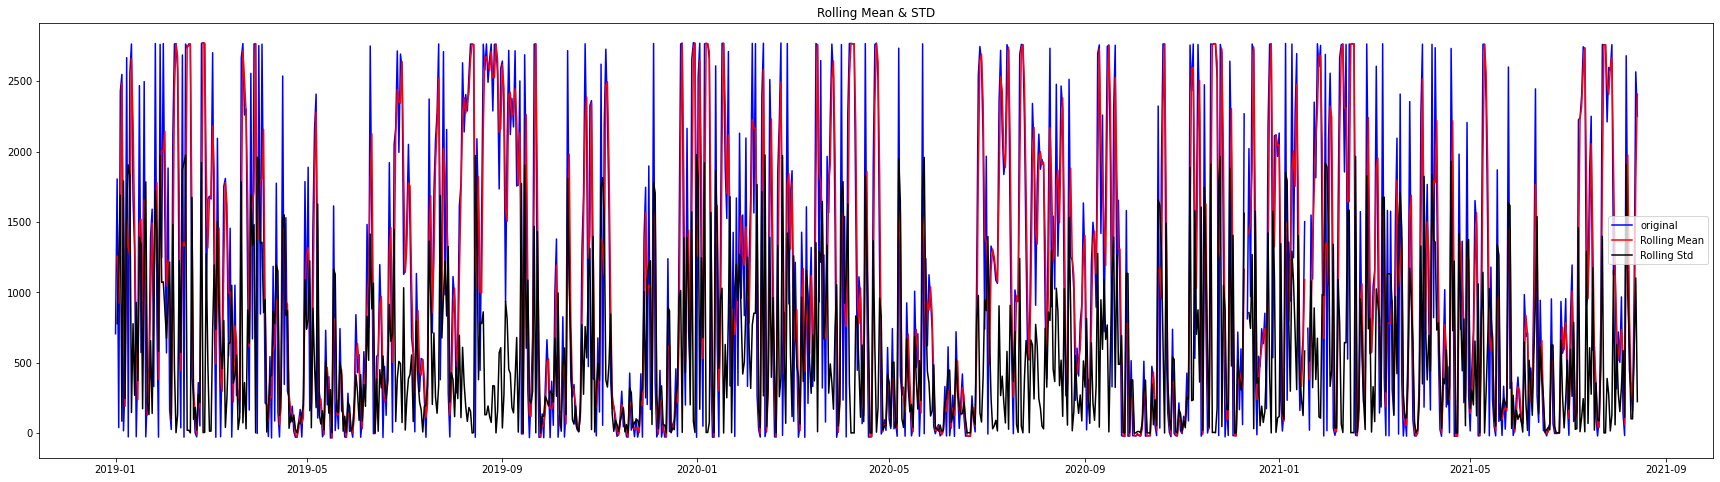

In [ ]:
#plot rolling statistcs 
plt.figure(figsize=(30,8))
orig = plt.plot(df_av['Power(kW)'], color = "blue" , label = "original")
mean = plt.plot(rolmean, color = "red" , label = "Rolling Mean")
orig = plt.plot(rolstd, color = "black" , label = "Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & STD")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


In [ ]:
df_av_2019.set_index('Timestamp',inplace = True)

In [ ]:
df_av_2019.reset_index(inplace = True)

In [ ]:
df_av_2019.fillna(method='ffill', inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# 1-  Power 


<Figure size 1440x576 with 0 Axes>

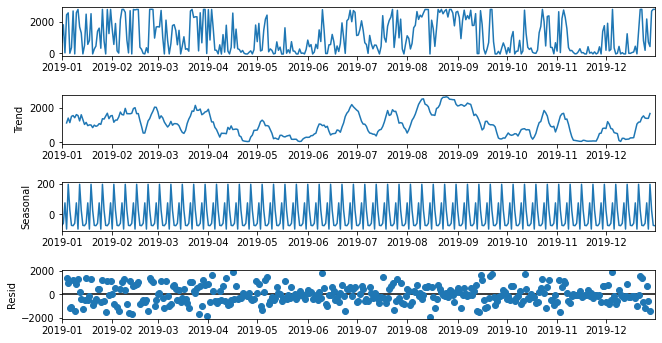

In [ ]:
# Time Series decomposition. 
plt.figure(figsize=(20,8))
decomposition = sm.tsa.seasonal_decompose(df_av_2019[['Power(kW)']], model = "additive")  
fig = decomposition.plot()
fig.set_size_inches(10, 5)
plt.show()

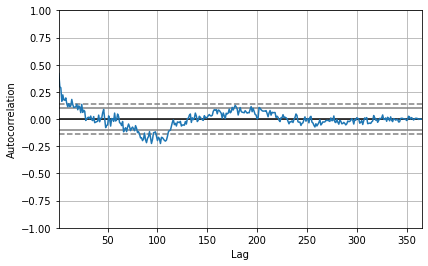

In [ ]:
# Autocorrelation plot.
plt.figure(figsize=(6.5,4))
x = pd.plotting.autocorrelation_plot(df_av_2019['Power(kW)'])
x.plot()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def ACF_and_PACF(data):
  fig = plt.figure(figsize = (6.5,8))
  ax1 = fig.add_subplot(211)
  fig = plot_acf(data , lags = 15 , ax=ax1)
  ax2 = fig.add_subplot(212)
  fig = plot_pacf(data , lags = 15 , ax=ax2)

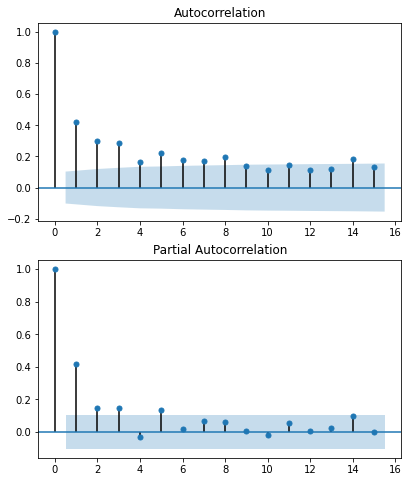

In [ ]:
ACF_and_PACF(df_av_2019['Power(kW)'])

Text(0.5, 1.0, 'Power Rolling Mean & STD')

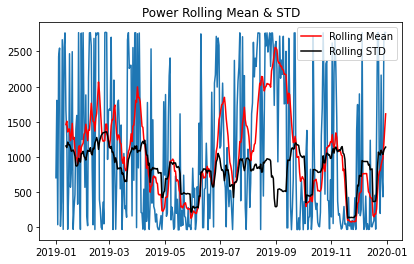

In [ ]:
# Rolling Window. 
plt.figure(figsize = (6.5,4))
X = df_av_2019['Power(kW)'].rolling(window=12).mean()
Y = df_av_2019['Power(kW)'].rolling(window=12).std()
plt.plot(df_av_2019['Power(kW)'])
plt.plot(X , color = 'red',label = "Rolling Mean")
plt.plot(Y , color = 'black',label = "Rolling STD")
plt.legend(loc="best")
plt.title("Power Rolling Mean & STD")

# 2- Tower Accelaration Lateral Raw

In [ ]:
df_av_2019

In [ ]:
# 2019-03-25 00:00:00	is na 
df_av_2019.reset_index(inplace = True)


In [ ]:
df_av_2019

Timestamp  Gearbox_T1_High_Speed_Shaft_Temperature  \
0   2019-01-01                                57.000000   
1   2019-01-02                                63.386665   
2   2019-01-03                                39.298332   
3   2019-01-04                                67.000000   
4   2019-01-05                                64.313332   
..         ...                                      ...   
360 2019-12-28                                51.000000   
361 2019-12-29                                64.351669   
362 2019-12-30                                61.188332   
363 2019-12-31                                61.845001   
364 2020-01-01                                44.860001   

     Gearbox_T3_High_Speed_Shaft_Temperature  \
0                                  59.000000   
1                                  65.489998   
2                                  41.551666   
3                                  68.700996   
4                                  66.285004   
..                                       ...   
360                                54.003334   
361                                66.245003   
362                                65.041664   
363                                65.718330   
364                                48.000000   

     Gearbox_T1_Intermediate_Speed_Shaft_Temperature  \
0                                          52.000000   
1                                          58.000000   
2                                          37.674999   
3                                          61.495018   
4                                          58.389999   
..                                               ...   
360                                        46.000000   
361                                        57.939999   
362                                        56.991665   
363                                       685.076477   
364                                        43.000000   

     Temperature Gearbox Bearing Hollow Shaft  Tower Acceleration Normal  \
0                                   56.158333                  47.053776   
1                                   62.221668                  47.044155   
2                                   44.000000                  35.647556   
3                                   65.177742                  72.104568   
4                                   62.605000                  81.797073   
..                                        ...                        ...   
360                                 53.328335                  24.866266   
361                                 62.055000                  83.330360   
362                                 61.119999                 149.980179   
363                                 62.154999                 634.206324   
364                                 50.276669                  14.808953   

     Gearbox_Oil-2_Temperature  Tower Acceleration Lateral  \
0                    57.000000                   18.890772   
1                    63.615002                   39.383240   
2                    42.101665                   17.710924   
3                    66.910301                   41.584549   
4                    64.458336                   46.627121   
..                         ...                         ...   
360                  53.000000                   15.153484   
361                  64.514999                   40.246704   
362                  62.178333                   67.627655   
363                 649.639297                  679.964003   
364                  48.618332                   15.074389   

     Temperature Bearing_A  Temperature Trafo-3  ...  \
0                35.000000            48.576668  ...   
1                30.000000           916.450100  ...   
2                21.415001            42.248333  ...   
3                36.848839            63.574749  ...   
4                31.000000            56.660000  ...   
..                     ...                  ...  ...

In [ ]:
df_av_2019 = df_av_2019.set_index('Timestamp')

Text(0.5, 1.0, 'Tower Accelaration Lateral Raw Rolling Mean & STD')

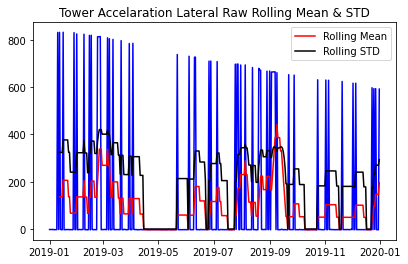

In [ ]:
movingAverage = df_av_2019['Tower Accelaration Lateral Raw'].rolling(window=12).mean()
movingSTD = df_av_2019['Tower Accelaration Lateral Raw'].rolling(window=12).std()
plt.figure(figsize=(6.5,4))
plt.plot(df_av_2019['Tower Accelaration Lateral Raw'],color = "blue" ,)
plt.plot(movingAverage , color = 'red',label = "Rolling Mean")
plt.plot(movingSTD , color = 'black',label = "Rolling STD")
plt.legend(loc="best")
plt.title("Tower Accelaration Lateral Raw Rolling Mean & STD")

<Figure size 1440x576 with 0 Axes>

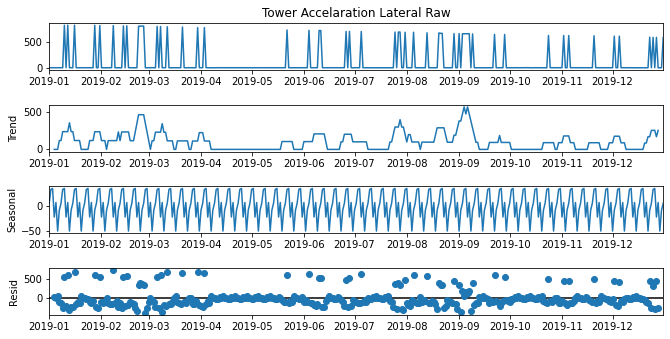

In [ ]:
# Time Series decomposition. 
plt.figure(figsize=(20,8))
fig.suptitle('Tower Accelaration Lateral Raw Decomposition')
decomposition = sm.tsa.seasonal_decompose(df_av_2019['Tower Accelaration Lateral Raw'], model = "additive") 
fig =decomposition.plot()
fig.set_size_inches(10, 5)



[]

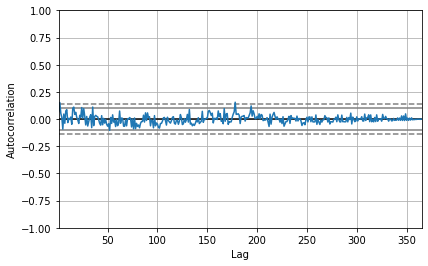

In [ ]:
plt.figure(figsize=(6.5,4))
x = pd.plotting.autocorrelation_plot(df_av_2019['Tower Accelaration Lateral Raw'])
fig.suptitle('Tower Accelaration Lateral Raw')
x.plot()


<Figure size 468x288 with 0 Axes>

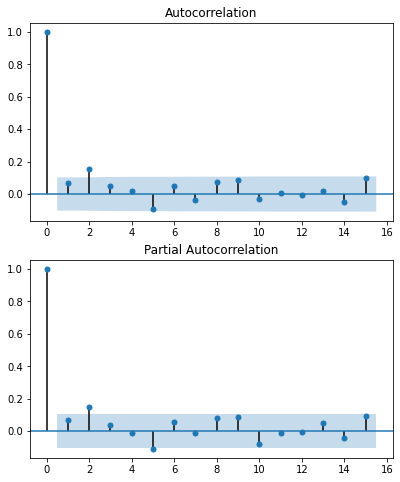

In [ ]:
plt.figure(figsize=(6.5,4))
ACF_and_PACF(df_av_2019['Tower Accelaration Lateral Raw'])

# 3- Turque


Text(0.5, 1.0, 'Torque Mean & STD')

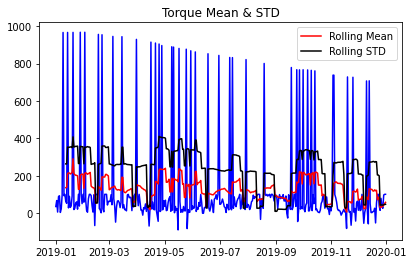

In [ ]:
movingAverage = df_av_2019['Torque'].rolling(window=12).mean()
movingSTD = df_av_2019['Torque'].rolling(window=12).std()
plt.figure(figsize=(6.5,4))
plt.plot(df_av_2019['Torque'],color = "blue" ,)
plt.plot(movingAverage , color = 'red',label = "Rolling Mean")
plt.plot(movingSTD , color = 'black',label = "Rolling STD")
plt.legend(loc="best")
plt.title("Torque Mean & STD")

<Figure size 1440x576 with 0 Axes>

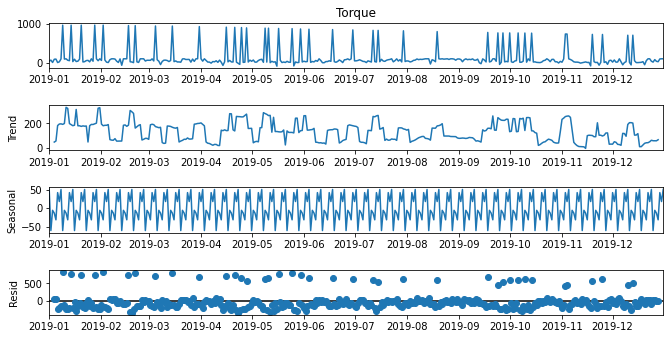

In [ ]:
# Time Series decomposition. 
plt.figure(figsize=(20,8))
decomposition = sm.tsa.seasonal_decompose(df_av_2019['Torque'], model = "additive") 
fig =decomposition.plot()
fig.set_size_inches(10, 5)

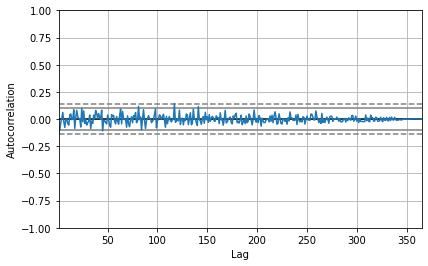

In [ ]:
plt.figure(figsize=(6.5,4))
x = pd.plotting.autocorrelation_plot(df_av_2019['Torque'])
x.plot()
plt.show()


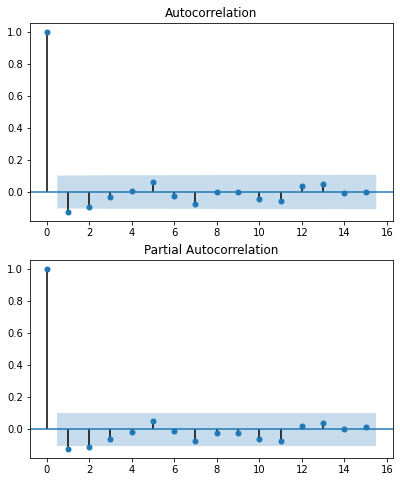

In [ ]:
ACF_and_PACF(df_av_2019['Torque'])

# 4- Gearbox Distributor Temperature

Text(0.5, 1.0, 'Gearbox distributor temperature Mean & STD')

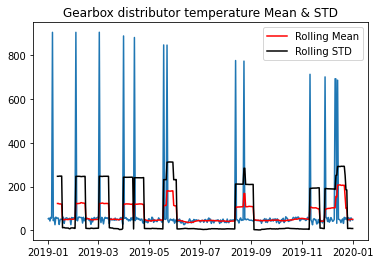

In [ ]:
movingAverage = df_av_2019['Gearbox_Distributor_Temperature'].rolling(window=12).mean()
movingSTD = df_av_2019['Gearbox_Distributor_Temperature'].rolling(window=12).std()
plt.plot(df_av_2019['Gearbox_Distributor_Temperature'])
plt.plot(movingAverage , color = 'red',label = "Rolling Mean")
plt.plot(movingSTD , color = 'black',label = "Rolling STD")
plt.legend(loc="best")
plt.title("Gearbox distributor temperature Mean & STD")

<Figure size 1440x576 with 0 Axes>

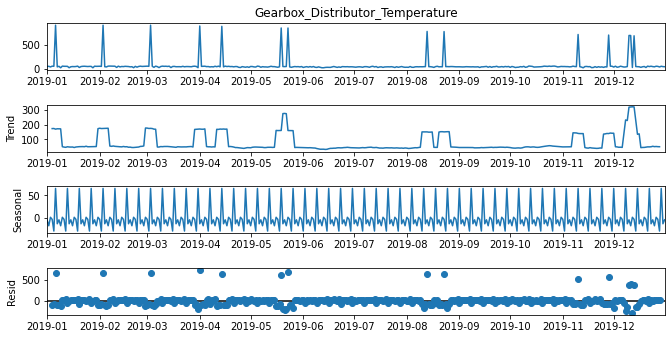

In [ ]:
# Time Series decomposition. 
plt.figure(figsize=(20,8))
decomposition = sm.tsa.seasonal_decompose(df_av_2019['Gearbox_Distributor_Temperature'], model = "additive") 
fig = decomposition.plot()
fig.set_size_inches(10, 5)

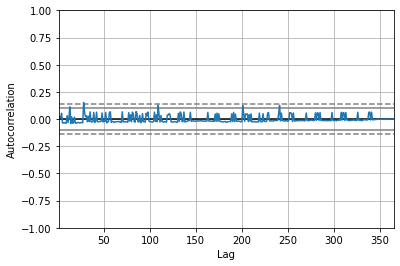

In [ ]:
x = pd.plotting.autocorrelation_plot(df_av_2019['Gearbox_Distributor_Temperature'])
x.plot()
plt.show()


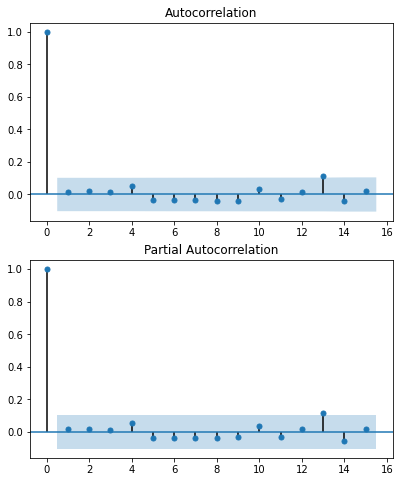

In [ ]:
ACF_and_PACF(df_av_2019['Gearbox_Distributor_Temperature'])

# 5- Hydraulic Prepressure

Text(0.5, 1.0, 'Hydraulic Prepressure Mean & STD')

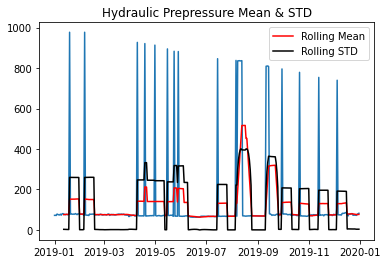

In [ ]:
movingAverage = df_av_2019['Hydraulic Prepressure'].rolling(window=12).mean()
movingSTD = df_av_2019['Hydraulic Prepressure'].rolling(window=12).std()
plt.plot(df_av_2019['Hydraulic Prepressure'])
plt.plot(movingAverage , color = 'red',label = "Rolling Mean")
plt.plot(movingSTD , color = 'black',label = "Rolling STD")
plt.legend(loc="best")
plt.title("Hydraulic Prepressure Mean & STD")

<Figure size 1440x576 with 0 Axes>

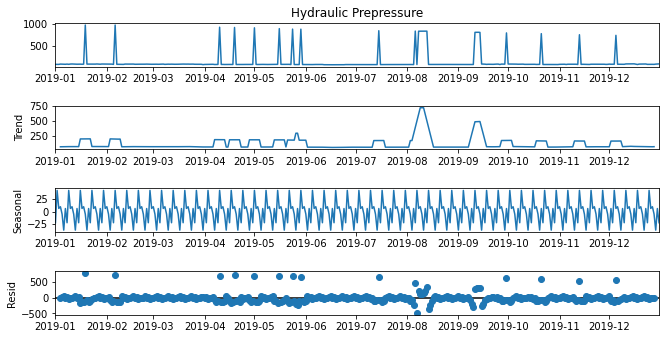

In [ ]:
# Time Series decomposition. 
plt.figure(figsize=(20,8))
decomposition = sm.tsa.seasonal_decompose(df_av_2019['Hydraulic Prepressure'], model = "additive") 
fig = decomposition.plot()
fig.set_size_inches(10, 5)

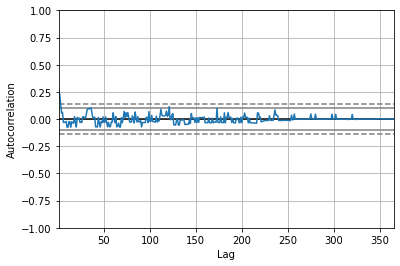

In [ ]:
x = pd.plotting.autocorrelation_plot(df_av_2019['Hydraulic Prepressure'])
x.plot()
plt.show()


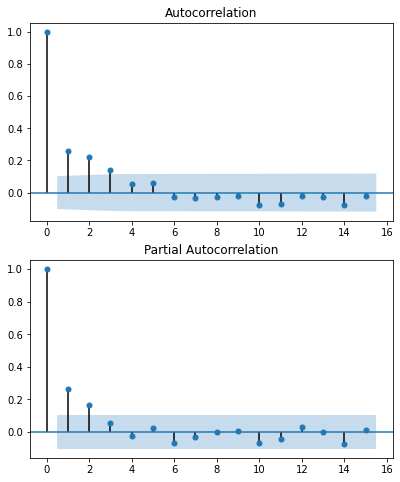

In [ ]:
ACF_and_PACF(df_av_2019['Hydraulic Prepressure'])

# 6- Temperature Heat Exchanger Converter Control Unit 

<Figure size 468x288 with 0 Axes>

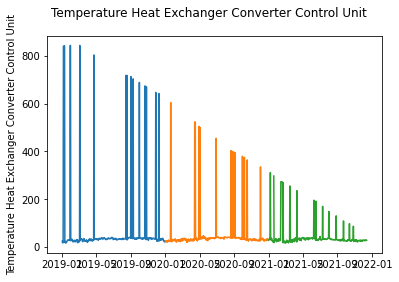

In [ ]:
plt.figure(figsize=(6.5,4))
fig, ax1,  = plt.subplots()
fig.suptitle('Temperature Heat Exchanger Converter Control Unit')
ax1.set_ylabel('Temperature Heat Exchanger Converter Control Unit')
plt.plot(df_av_2019['Temperature Heat Exchanger Converter Control Unit'])
plt.plot(df_av_2020['Temperature Heat Exchanger Converter Control Unit'])
plt.plot(df_av_2021['Temperature Heat Exchanger Converter Control Unit'])



Text(0.5, 1.0, 'Temperature Heat Exchanger Converter Control Unit Mean & STD')

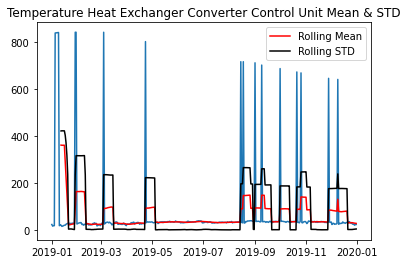

In [ ]:
movingAverage = df_av_2019['Temperature Heat Exchanger Converter Control Unit'].rolling(window=12).mean()
movingSTD = df_av_2019['Temperature Heat Exchanger Converter Control Unit'].rolling(window=12).std()
plt.plot(df_av_2019['Temperature Heat Exchanger Converter Control Unit'])
plt.plot(movingAverage , color = 'red',label = "Rolling Mean")
plt.plot(movingSTD , color = 'black',label = "Rolling STD")
plt.legend(loc="best")
plt.title("Temperature Heat Exchanger Converter Control Unit Mean & STD")

<Figure size 2160x576 with 0 Axes>

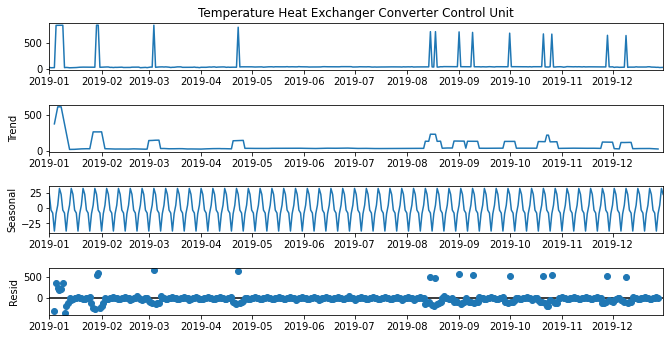

In [ ]:
# Time Series decomposition. 
plt.figure(figsize=(30,8))
decomposition = sm.tsa.seasonal_decompose(df_av_2019['Temperature Heat Exchanger Converter Control Unit'], model = "additive") 
fig = decomposition.plot()
fig.set_size_inches(10, 5)

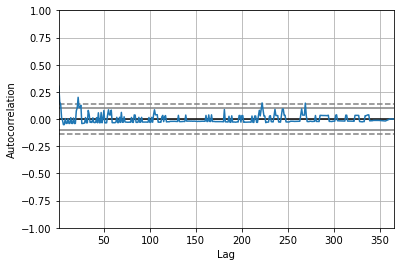

In [ ]:
x = pd.plotting.autocorrelation_plot(df_av_2019['Temperature Heat Exchanger Converter Control Unit'])
x.plot()
plt.show()


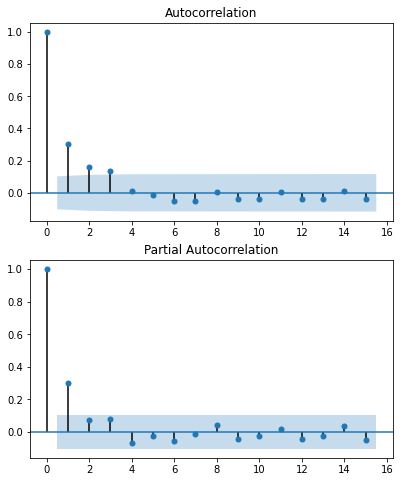

In [ ]:
ACF_and_PACF(df_av_2019['Temperature Heat Exchanger Converter Control Unit'])

#7- Angle Rotor Position

In [ ]:
#df.columns
#features_df.columns

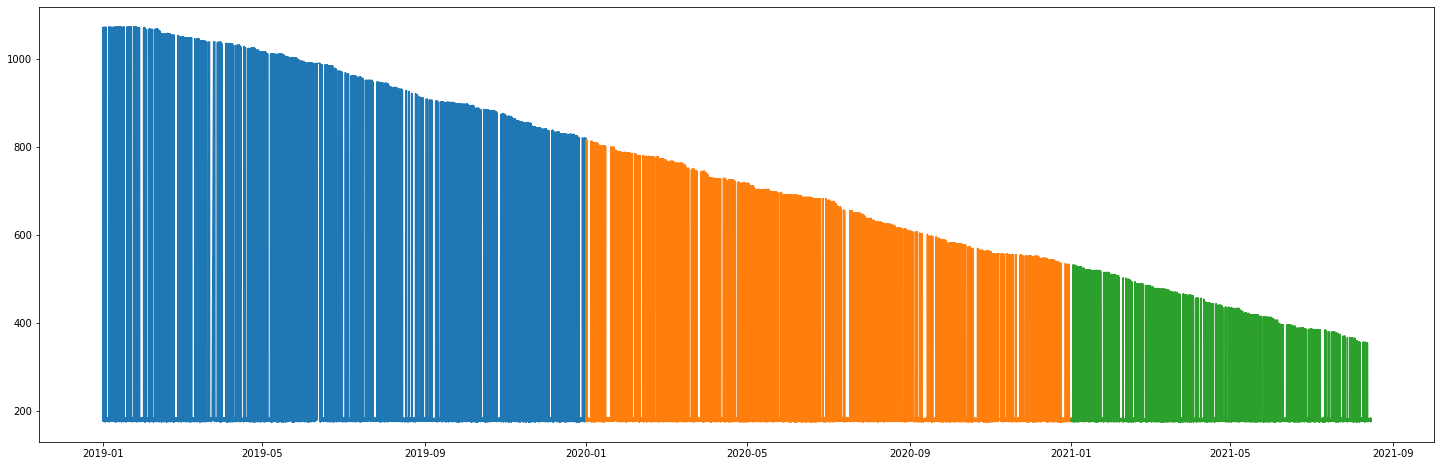

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(df_Power_2019['Angle Rotor Position'])
plt.plot(df_Power_2020['Angle Rotor Position'])
plt.plot(df_Power_2021['Angle Rotor Position'])



Text(0.5, 1.0, 'Angle Rotor Position Mean & STD')

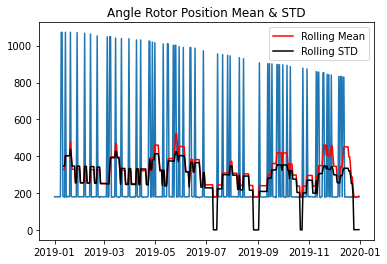

In [ ]:
movingAverage = df_av_2019['Angle Rotor Position'].rolling(window=12).mean()
movingSTD = df_av_2019['Angle Rotor Position'].rolling(window=12).std()
plt.plot(df_av_2019['Angle Rotor Position'])
plt.plot(movingAverage , color = 'red',label = "Rolling Mean")
plt.plot(movingSTD , color = 'black',label = "Rolling STD")
plt.legend(loc="best")
plt.title("Angle Rotor Position Mean & STD")

<Figure size 2160x576 with 0 Axes>

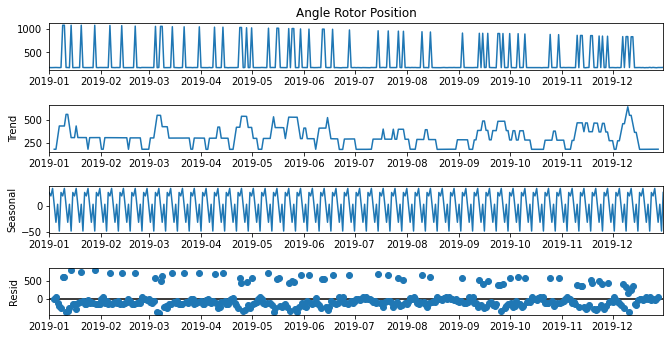

In [ ]:
# Time Series decomposition. 
plt.figure(figsize=(30,8))
decomposition = sm.tsa.seasonal_decompose(df_av_2019['Angle Rotor Position'], model = "additive") 
fig = decomposition.plot()
fig.set_size_inches(10, 5)

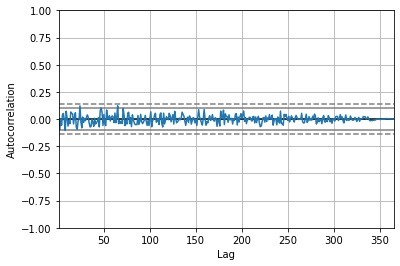

In [ ]:
x = pd.plotting.autocorrelation_plot(df_av_2019['Angle Rotor Position'])
x.plot()
plt.show()


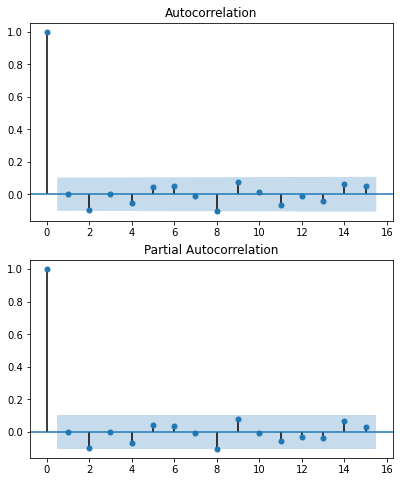

In [ ]:
ACF_and_PACF(df_av_2019['Angle Rotor Position'])

# Extra

In [ ]:
df_av_2019.reset_index(inplace = True)

In [ ]:
df_av_2020.reset_index(inplace = True)
df_av_2021.reset_index(inplace = True)

In [ ]:
df_years = pd.DataFrame()
df_years['Date'] = df_av_2019['Timestamp']
df_years['2019'] = df_av_2019['Power(kW)']
df_years['2020'] = df_av_2020['Power(kW)']
df_years['2021'] = df_av_2021['Power(kW)']
df_years.head()

Date         2019         2020         2021
0 2019-01-01   705.876648   -30.160000  2131.336670
1 2019-01-02  1805.343384  2529.731689   227.281662
2 2019-01-03    38.768333  2769.086670    14.211667
3 2019-01-04  2429.202637  1008.643311   152.786667
4 2019-01-05  2548.213379    48.906666  2767.935059

In [ ]:
import plotly.express as px
fig = px.line(df_years, x="Date", y=df_years.columns,
              hover_data={"Date": "|%B %d"},
              title='Power')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## Weakly

In [ ]:
def weakly(df,feature) :
  x = 0
  pp_av = []
  time = []
  for c in range(0,len(df),7):
    data = df.iloc[c:c+7,:]
    time.append(data.iloc[0][0])
    pp_av.append(data[feature].mean())
  return(pp_av,time)



In [ ]:
p_2019, t = weakly(df_av_2019,'Power(KW)')
p_2020,y  = weakly(df_av_2020,'Power(KW)')
p_2021,x  = weakly(df_av_2021,'Power(KW)')
df_years = pd.DataFrame()
df_years['Date'] = t
df_years['2019'] = p_2019
df_years['2020'] = p_2020
#df_years['2021'] = p_2021
df_years.head()

Date         2019         2020
0 2019-01-01  1129.619913  1694.302642
1 2019-01-08  1555.217371  1290.738801
2 2019-01-15  1015.041448  1848.267624
3 2019-01-22  1044.399759   887.046413
4 2019-01-29  1559.515270  1240.376417

In [ ]:
df_years.tail()

Date         2019         2020
48 2019-12-03   567.902394   484.789769
49 2019-12-10   175.587864  1482.105007
50 2019-12-17  1064.665223   798.389060
51 2019-12-24  1393.605957  1626.210478
52 2019-12-31  2767.675049  2042.235901

In [ ]:
import plotly.express as px
fig = px.line(df_years, x="Date", y=df_years.columns,
              hover_data={"Date": "|%B %d"},
              title='Power')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [ ]:
def weak(feature):
  p_2019, t = weakly(df_av_2019,feature)
  p_2020,y  = weakly(df_av_2020,feature)
  p_2021,x  = weakly(df_av_2021,feature)
  df_years = pd.DataFrame()
  df_years['Date'] = t
  df_years['2019'] = p_2019
  df_years['2020'] = p_2020
 # df_years['2021'] = p_2021
  return df_years


In [ ]:
def show(feature):
  df_try = weak(feature)
  fig = px.line(df_try, x="Date", y=df_try.columns,
                hover_data={"Date": "|%B %d"},
                title=feature)
  fig.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig.show()
show('Torque') 

In [ ]:
show('Tower Accelaration Lateral Raw') 

In [ ]:
show('Gearbox_Distributor_Temperature') 

In [ ]:
show('Hydraulic Prepressure') 

In [ ]:
show('Angle Rotor Position') 

In [ ]:
show('Temperature Heat Exchanger Converter Control Unit') 